In [1]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pylab
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
 
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score,precision_score,recall_score,accuracy_score,roc_curve,roc_auc_score
      
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.max_columns', 50)

from statannot import add_stat_annotation
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, cv


/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


<font size="7">L&T Vehicle Loan Default Prediction</font> 

![titel](car.jpg)

# Project Goal

LTFS is one of India’s most respected & leading NBFCs providing finance. 
About L&T Financial Services (LTFS): Headquartered in Mumbai, LTFS is one of India’s most respected & leading NBFCs providing finance for two wheeler, farm equipment, housing, infra & microfinance. With a strong parentage & stable leadership, it also has a flourishing Mutual Fund & Wealth Advisory business under its broad umbrella.

Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default.

A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided in the datasets:

Ziel dieses Projekts ist es, vorherzusagen, ob es im ersten EWI zu einem Zahlungsausfall bei einem bis dato fälligen Fahrzeugkredit kommen wird oder nicht.
- Loanee Information (Demographic data like age, Identity proof etc.)
- Loan Information (Disbursal details, loan to value ratio etc.)
- Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)

Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.

# Data description

The Data Set contains: 
- train.csv
- test.csv
- data_dictionary.csv 


First, lets import some of the libraries that we’ll be using

Let’s read the data

In [4]:
sub=pd.read_csv('datasets_173764_392639_Submission_LTFS.csv')

In [5]:
sub.drop('UniqueID', axis=1, inplace=True)

In [6]:
test=pd.read_csv('test_bqCt9Pv.csv')
test=pd.concat([test,sub], axis=1)

In [7]:
test.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [8]:
test.shape

(112392, 41)

In [9]:
train=pd.read_csv('train.csv')
data=pd.concat([train, test])

In [10]:
print(data.shape)
print(train.shape)
print(test.shape)
print(sub.shape)

(345546, 41)
(233154, 41)
(112392, 41)
(112392, 1)


In [11]:
data

UniqueID  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0       420825    50578             58400      89.55  67         22807         
1       537409    47145             65550      73.23  67         22807         
2       417566    53278             61360      89.63  67         22807         
3       624493    57513             66113      88.48  67         22807         
4       539055    52378             60300      88.39  67         22807         
...        ...      ...               ...        ...  ..           ...         
112387  755547    44875             72509      67.58  74         16646         
112388  716994    53549             72509      78.61  74         16646         
112389  709352    55243             72509      81.37  74         16646         
112390  699795    55243             72509      81.37  74         16646         
112391  755244    40274             72509      60.68  74         16646         

        manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0       45               1441                01-01-84      Salaried         
1       45               1502                31-07-85      Self employed    
2       45               1497                24-08-85      Self employed    
3       45               1501                30-12-93      Self employed    
4       45               1495                09-12-77      Self employed    
...     ..                ...                     ...                ...    
112387  86               2591                14-05-92      Self employed    
112388  86               2593                24-04-84      Self employed    
112389  86               2593                01-01-86      Self employed    
112390  86               2593                01-01-73      Self employed    
112391  86               2593                01-01-74      Self employed    

       DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  \
0       03-08-18      6         1998              1                   
1       26-09-18      6         1998              1                   
2       01-08-18      6         1998              1                   
3       26-10-18      6         1998              1                   
4       26-09-18      6         1998              1                   
...          ...     ..          ...             ..                   
112387  28-11-18      4         3823              1                   
112388  19-11-18      4         3823              1                   
112389  17-11-18      4         3823              1                   
112390  15-11-18      4         3823              1                   
112391  28-11-18      4         3823              1                   

        Aadhar_flag  PAN_flag  VoterID_flag  Driving_flag  Passport_flag  \
0       1            0         0             0             0               
1       1            0         0             0             0               
2       1            0         0             0             0               
3       1            0         0             0             0               
4       1            0         0             0             0               
...    ..           ..        ..            ..            ..               
112387  1            0         0             0             0               
112388  1            0         0             0             0               
112389  1            0         0             0             0               
112390  1            0         0             0             0               
112391  1            1         0             0             0               

        PERFORM_CNS.SCORE PERFORM_CNS.SCORE.DESCRIPTION  PRI.NO.OF.ACCTS  \
0       0                  No Bureau History Available   0                 
1       598                I-Medium Risk                 1                 
2       0                  No Bureau History Available   0                 
3       305                L-Very High Risk         

the dimension of the data set is: (345546, 42)

We’ll be using the data dictionary provides to help us become familiar with the columns and what each represents in the data set

In [12]:
description=pd.read_excel('datasets_172788_390946_Data Dictionary.xlsx')

In [13]:
description.columns

Index(['Variable Name', 'Description', 'Unnamed: 2'], dtype='object')

In [14]:
#description['type']= data.dtypes.to_frame().reset_index().rename(columns={0:'type'})['type']
description.drop('Unnamed: 2', axis=1, inplace=True)

In [15]:
description[['Variable Name', 'Description']].head(41)

Variable Name  \
0   UniqueID                              
1   loan_default                          
2   disbursed_amount                      
3   asset_cost                            
4   ltv                                   
5   branch_id                             
6   supplier_id                           
7   manufacturer_id                       
8   Current_pincode                       
9   Date.of.Birth                         
10  Employment.Type                       
11  DisbursalDate                         
12  State_ID                              
13  Employee_code_ID                      
14  MobileNo_Avl_Flag                     
15  Aadhar_flag                           
16  PAN_flag                              
17  VoterID_flag                          
18  Driving_flag                          
19  Passport_flag                         
20  PERFORM_CNS.SCORE                     
21  PERFORM_CNS.SCORE.DESCRIPTION         
22  PRI.NO.OF.ACCTS                       
23  PRI.ACTIVE.ACCTS                      
24  PRI.OVERDUE.ACCTS                     
25  PRI.CURRENT.BALANCE                   
26  PRI.SANCTIONED.AMOUNT                 
27  PRI.DISBURSED.AMOUNT                  
28  SEC.NO.OF.ACCTS                       
29  SEC.ACTIVE.ACCTS                      
30  SEC.OVERDUE.ACCTS                     
31  SEC.CURRENT.BALANCE                   
32  SEC.SANCTIONED.AMOUNT                 
33  SEC.DISBURSED.AMOUNT                  
34  PRIMARY.INSTAL.AMT                    
35  SEC.INSTAL.AMT                        
36  NEW.ACCTS.IN.LAST.SIX.MONTHS          
37  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS   
38  AVERAGE.ACCT.AGE                      
39  CREDIT.HISTORY.LENGTH                 
40  NO.OF_INQUIRIES                       

                                                                           Description  
0   Identifier for customers                                                            
1   Payment default in the first EMI on due date                                        
2   Amount of Loan disbursed                                                            
3   Cost of the Asset                                                                   
4   Loan to Value of the asset                                                          
5   Branch where the loan was disbursed                                                 
6   Vehicle Dealer where the loan was disbursed                                         
7   Vehicle manufacturer(Hero, Honda, TVS etc.)                                         
8   Current pincode of the customer                                                     
9   Date of birth of the customer                                                       
10  Employment Type of the customer (Salaried/Self Employed)                            
11  Date of disbursement                                                                
12  State of disbursement                                                               
13  Employee of the organization who logged the disbursement                            
14  if Mobile no. was shared by the customer then flagged as 1                          
15  if aadhar was shared by the customer then flagged as 1                              
16  if pan was shared by the customer then flagged as 1                                 
17  if voter  was shared by the customer then flagged as 1                              
18  if DL was shared by the customer then flagged as 1                                  
19  if passport was shared by the customer then flagged as 1                            
20  Bureau Score                                                                        
21  Bureau score description                                                            
22  count of total loans taken by the customer at the time of disbursement              
23  count of active loans taken by the customer at the time of disbursement        

The dataset contains 41 features and a target variable. The target variable is encoded as 1 & 0, Default & NO.     
All variables starting with Sec are loans where the borrower act as a co-applicant or gaurantor.

# Data cleaning

## Dealing with missing values

In [17]:
missing = pd.DataFrame(data.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/data.shape[0],3)
missing['type']= pd.DataFrame(data.dtypes, columns=["type"])
missing= missing.sort_index()
missing

Number  Percentage     type
AVERAGE.ACCT.AGE                     0      0.00         object 
Aadhar_flag                          0      0.00         int64  
CREDIT.HISTORY.LENGTH                0      0.00         object 
Current_pincode_ID                   0      0.00         int64  
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  0      0.00         int64  
Date.of.Birth                        0      0.00         object 
DisbursalDate                        0      0.00         object 
Driving_flag                         0      0.00         int64  
Employee_code_ID                     0      0.00         int64  
Employment.Type                      11104  0.03         object 
MobileNo_Avl_Flag                    0      0.00         int64  
NEW.ACCTS.IN.LAST.SIX.MONTHS         0      0.00         int64  
NO.OF_INQUIRIES                      0      0.00         int64  
PAN_flag                             0      0.00         int64  
PERFORM_CNS.SCORE                    0      0.00         int64  
PERFORM_CNS.SCORE.DESCRIPTION        0      0.00         object 
PRI.ACTIVE.ACCTS                     0      0.00         int64  
PRI.CURRENT.BALANCE                  0      0.00         int64  
PRI.DISBURSED.AMOUNT                 0      0.00         int64  
PRI.NO.OF.ACCTS                      0      0.00         int64  
PRI.OVERDUE.ACCTS                    0      0.00         int64  
PRI.SANCTIONED.AMOUNT                0      0.00         int64  
PRIMARY.INSTAL.AMT                   0      0.00         int64  
Passport_flag                        0      0.00         int64  
SEC.ACTIVE.ACCTS                     0      0.00         int64  
SEC.CURRENT.BALANCE                  0      0.00         int64  
SEC.DISBURSED.AMOUNT                 0      0.00         int64  
SEC.INSTAL.AMT                       0      0.00         int64  
SEC.NO.OF.ACCTS                      0      0.00         int64  
SEC.OVERDUE.ACCTS                    0      0.00         int64  
SEC.SANCTIONED.AMOUNT                0      0.00         int64  
State_ID                             0      0.00         int64  
UniqueID                             0      0.00         int64  
VoterID_flag                         0      0.00         int64  
asset_cost                           0      0.00         int64  
branch_id                            0      0.00         int64  
disbursed_amount                     0      0.00         int64  
loan_default                         0      0.00         int64  
ltv                                  0      0.00         float64
manufacturer_id                      0      0.00         int64  
supplier_id                          0      0.00         int64

As we see above, only the variable Employment.Type has missing values. This variable has two categories: self employes and salaried. Presumably, customers who do not specify their employment status are unemployed. Therefore, we fill NA values with unknown.

In [18]:
data['Employment.Type'].fillna('Unknown', inplace=True)
#data.dropna(inplace=True)

In [19]:
data['Employment.Type'].value_counts()

Self employed    187429
Salaried         147013
Unknown          11104 
Name: Employment.Type, dtype: int64

## Transformimg the data 

In [20]:
data['Date.of.Birth']

0         01-01-84
1         31-07-85
2         24-08-85
3         30-12-93
4         09-12-77
            ...   
112387    14-05-92
112388    24-04-84
112389    01-01-86
112390    01-01-73
112391    01-01-74
Name: Date.of.Birth, Length: 345546, dtype: object

we will now obtain the year of birth from the variable Date.of.Birth

In [21]:
def age(x):
    year=int(x.split('-')[2])
    if year>=0 and year<=19:
        return year+2000
    else:
        return year+1900
    
data['Date.of.Birth']=data['Date.of.Birth'].apply(age)

In [22]:
data['Date.of.Birth']

0         1984
1         1985
2         1985
3         1993
4         1977
          ... 
112387    1992
112388    1984
112389    1986
112390    1973
112391    1974
Name: Date.of.Birth, Length: 345546, dtype: int64

In [23]:
data['DisbursalDate']=data['DisbursalDate'].apply(age)

In [24]:
data['DisbursalDate'].value_counts()

2018    345546
Name: DisbursalDate, dtype: int64

In [25]:
data['age']=data['DisbursalDate']-data['Date.of.Birth']

In [26]:
data['PERFORM_CNS.SCORE'].value_counts(normalize=True)

0     0.51
738   0.04
300   0.04
825   0.03
15    0.01
      ... 
884   0.00
867   0.00
822   0.00
863   0.00
834   0.00
Name: PERFORM_CNS.SCORE, Length: 574, dtype: float64

In [27]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                174843
C-Very Low Risk                                            23870 
A-Very Low Risk                                            21683 
D-Very Low Risk                                            16472 
B-Very Low Risk                                            13696 
M-Very High Risk                                           12808 
F-Low Risk                                                 12176 
K-High Risk                                                12141 
H-Medium Risk                                              10142 
E-Low Risk                                                 8393  
I-Medium Risk                                              8260  
G-Low Risk                                                 5795  
J-High Risk                                                5526  
Not Scored: Sufficient History Not Available               5025  
Not Scored: Not Enough Info available on the customer      4940  
Not Scored

We will now convert the variable PERFORM_CNS.SCORE.DESCRIPTION form category to integer

In [28]:
temp=data['PERFORM_CNS.SCORE.DESCRIPTION'].tolist()
for i in range(data.shape[0]):
    if temp[i]=='M-Very High Risk'or temp[i]=='L-Very High Risk':
        temp[i]=1
    elif temp[i]=='K-High Risk'or temp[i]=='J-High Risk':
        temp[i]=2
    elif temp[i]=='I-Medium Risk'or temp[i]=='H-Medium Risk':
        temp[i]=3
    elif temp[i]=='G-Low Risk'or temp[i]=='F-Low Risk'or temp[i]=='E-Low Risk':
        temp[i]=4    
    elif temp[i]=='D-Very Low Risk'or temp[i]=='C-Very Low Risk'or temp[i]=='B-Very Low Risk'or temp[i]=='A-Very Low Risk':
        temp[i]=5
    else:
        temp[i]=0
temp=data['PERFORM_CNS.SCORE.DESCRIPTION']=temp

In [29]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts(normalize=True)

0   0.56
5   0.22
4   0.08
3   0.05
2   0.05
1   0.04
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: float64

In [30]:
k= data[data['PERFORM_CNS.SCORE']<300]['PERFORM_CNS.SCORE'].unique()

In [31]:
for i in k:
     data['PERFORM_CNS.SCORE']=data['PERFORM_CNS.SCORE'].replace(i, 0)

In [32]:
data['PERFORM_CNS.SCORE'].value_counts(normalize=True)

0     0.56
738   0.04
300   0.04
825   0.03
763   0.01
      ... 
863   0.00
822   0.00
860   0.00
834   0.00
884   0.00
Name: PERFORM_CNS.SCORE, Length: 568, dtype: float64

We calculate from the variables AVERAGE.ACCT.AGE (Durchschnittliche Kreditlaufzeit) and CREDIT.HISTORY.LENGTH (Time since first loan) the number of mounts


In [33]:
temp=data['AVERAGE.ACCT.AGE'].tolist()
l=[]
for i in temp:
    year=int(i.split(' ')[0].split('y')[0])
    month=int(i.split(' ')[1].split('m')[0])
    t=month+(year*12)
    l.append(t)
data['AVERAGE.ACCT.AGE']=l

In [34]:
#data['CREDIT.HISTORY.LENGTH_org']=data['CREDIT.HISTORY.LENGTH']

In [35]:
data['CREDIT.HISTORY.LENGTH'].value_counts()

0yrs 0mon     177178
0yrs 6mon     7456  
2yrs 1mon     6932  
0yrs 7mon     6243  
2yrs 0mon     5762  
              ...   
24yrs 0mon    1     
34yrs 5mon    1     
23yrs 3mon    1     
22yrs 0mon    1     
24yrs 8mon    1     
Name: CREDIT.HISTORY.LENGTH, Length: 307, dtype: int64

In [36]:
temp=data['CREDIT.HISTORY.LENGTH'].tolist()
l=[]
for i in temp:
    year=int(i.split(' ')[0].split('y')[0])
    month=int(i.split(' ')[1].split('m')[0])
    t=month+(year*12)
    l.append(t)
data['CREDIT.HISTORY.LENGTH']=l

In [39]:
 data['disbursed_amount_asset_ratio'] = (data['disbursed_amount'] /data['asset_cost'])

we well combine the primary and secondary account informations 

In [40]:
data['NO.OF.ACCTS']=data['PRI.NO.OF.ACCTS']+data['SEC.NO.OF.ACCTS']# Anzahl der gesamten kredite(pre und sec)
data['ACTIVE.ACCTS']=data['PRI.ACTIVE.ACCTS']+data['SEC.ACTIVE.ACCTS']# Anzahl der gesamten aktiven kredite(pre und sec)
data['Inactive accounts']=data['NO.OF.ACCTS']-data['ACTIVE.ACCTS']
data['OVERDUE.ACCTS']=data['PRI.OVERDUE.ACCTS']+data['SEC.OVERDUE.ACCTS']# Anzahl Zahlungsausfallkonten(pre und sec)
data['CURRENT.BALANCE']=data['PRI.CURRENT.BALANCE']+data['SEC.CURRENT.BALANCE']#der gesamt zurückzuzahlende betrag(pre und sec)
data['SANCTIONED.AMOUNT']=data['PRI.SANCTIONED.AMOUNT']+data['SEC.SANCTIONED.AMOUNT']# der gesamte sanktionietrte betrag
data['DISBURSED.AMOUNT']=data['PRI.DISBURSED.AMOUNT']+data['SEC.DISBURSED.AMOUNT']#der gesamte ausgezahlte betrag (pre und sec)
data['INSTAL.AMT']=data['PRIMARY.INSTAL.AMT']+data['SEC.INSTAL.AMT']# gesamte monatsrate (pre und sec)
data['BAL_DISBURSE_ratio'] = (np.round((1+data['CURRENT.BALANCE'])/(1+data['DISBURSED.AMOUNT']),2))*100
data['SACTIONED_DISBURSE_ratio'] = (np.round((1+data['SANCTIONED.AMOUNT'])/(1+data['DISBURSED.AMOUNT']),2))*100
data['total_identiy']=data['Aadhar_flag']+data['PAN_flag']+data['VoterID_flag']+data['Driving_flag']+data['Passport_flag']
data['ratio_delq']=(data['OVERDUE.ACCTS']+1)/(data['ACTIVE.ACCTS']+1)


In [41]:
data['asset_value']=data['disbursed_amount']*(data['ltv']/100)
data['value_cost']=data['asset_cost']-data['asset_value']
data['value_per_cost']=data['value_cost']/data['asset_value']
data['extra_finance']=data['asset_cost']*(data['ltv']/100)-data['disbursed_amount']
data['asset_disburse']=(data['asset_cost']-data['disbursed_amount'])/data['disbursed_amount']
data['sixmmonths_dfault']=data['NEW.ACCTS.IN.LAST.SIX.MONTHS']-data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']

In [42]:
data['Branch_Emp_code']=(data['Employee_code_ID']+data['branch_id']).astype(np.object)
data['Pin_Emp_code']=(data['Employee_code_ID']+data['Current_pincode_ID']).astype(np.object)

we will remove the following variables from the dataset:
- **UniqueID**: randomly generated
- **supplier_id**: the suppliers are anonymous in the dataset 
- **Current_pincode_ID**: This variable has one, two, three or four digits, so that a geographical assignment is impossible
- **DisbursalDate**: has no influence on the ability to repay
- **Employee_code_ID**: randomly generated


In [43]:
drop=['UniqueID','DisbursalDate','PRI.NO.OF.ACCTS',
     'SEC.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS','SEC.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'SEC.OVERDUE.ACCTS',
     'PRI.CURRENT.BALANCE','SEC.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','SEC.SANCTIONED.AMOUNT', 
     'PRI.DISBURSED.AMOUNT','SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'MobileNo_Avl_Flag',
      'Date.of.Birth']

In [44]:
data.drop(drop, inplace=True, axis=1)

In [45]:
loan = data.copy()

Some variables are categorical but they are represented in the data set as integer. Therefore we convert them to object. 

In [46]:
categorical=['Employment.Type','branch_id','manufacturer_id','State_ID', 
             'PERFORM_CNS.SCORE.DESCRIPTION','Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
             'Passport_flag','supplier_id', 'total_identiy','Current_pincode_ID',"Employee_code_ID"]

In [47]:
data[categorical]=data[categorical].astype('str')

In [48]:
numerical=data.drop(categorical, axis=1).columns

In [53]:
data['age_at_first_kredit']=data['age']-(data['CREDIT.HISTORY.LENGTH']/12)

# EDA

## Univariate Visualisation

### Categorial variables 

[Text(0.5, 0, 'Loan default'), Text(0, 0.5, 'Count')]

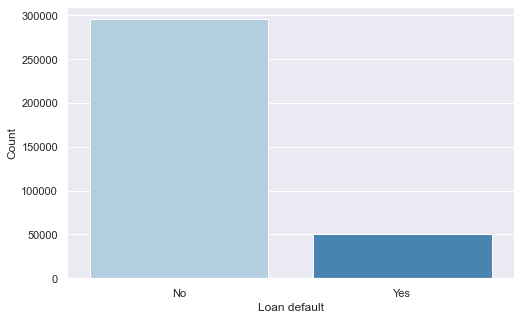

In [54]:
sns.set()
data['loan_default_str']=data['loan_default'].replace(0,"No").replace(1,"Yes")
plt.subplots(figsize=(8,5))
ax = sns.countplot(x='loan_default_str', data=data, palette='Blues')
ax.set(xlabel='Loan default', ylabel='Count')

In [55]:
data['PERFORM_CNS.SCORE.DESCRIPTION_str']=data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('0', "No score available").replace('1', 'Slim').replace('2', 'Doubtful').replace('3', 'Fair').replace('4', 'Good').replace('5', 'Great')

[Text(0.5, 0, 'Performance score'), Text(0, 0.5, 'Count')]

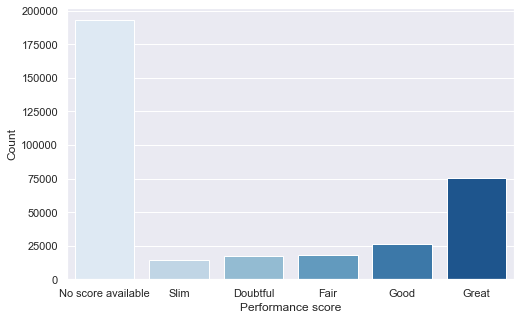

In [56]:
sns.set()
data1=data.rename(columns={'PERFORM_CNS.SCORE.DESCRIPTION_str':'Score'})
plt.subplots(figsize=(8,5))
ax = sns.countplot(x='Score', data=data1, palette='Blues', 
                   order=["No score available",'Slim','Doubtful','Fair','Good','Great'])
ax.set(xlabel='Performance score', ylabel='Count')

Self employed   0.54
Salaried        0.43
Unknown         0.03
Name: Employment.Type, dtype: float64


Self employed    187429
Salaried         147013
Unknown          11104 
Name: Employment.Type, dtype: int64

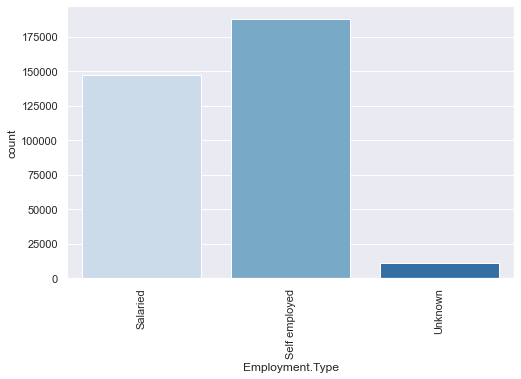

In [57]:
print(data['Employment.Type'].value_counts(normalize=True))
sns.set()
plt.subplots(figsize=(8,5))
ax = sns.countplot(x='Employment.Type', data=data, palette='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
data['Employment.Type'].value_counts()

In [58]:
l=['Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag']
for i in l:
    data[i]=data[i].replace('1', "Yes").replace('0', 'No')

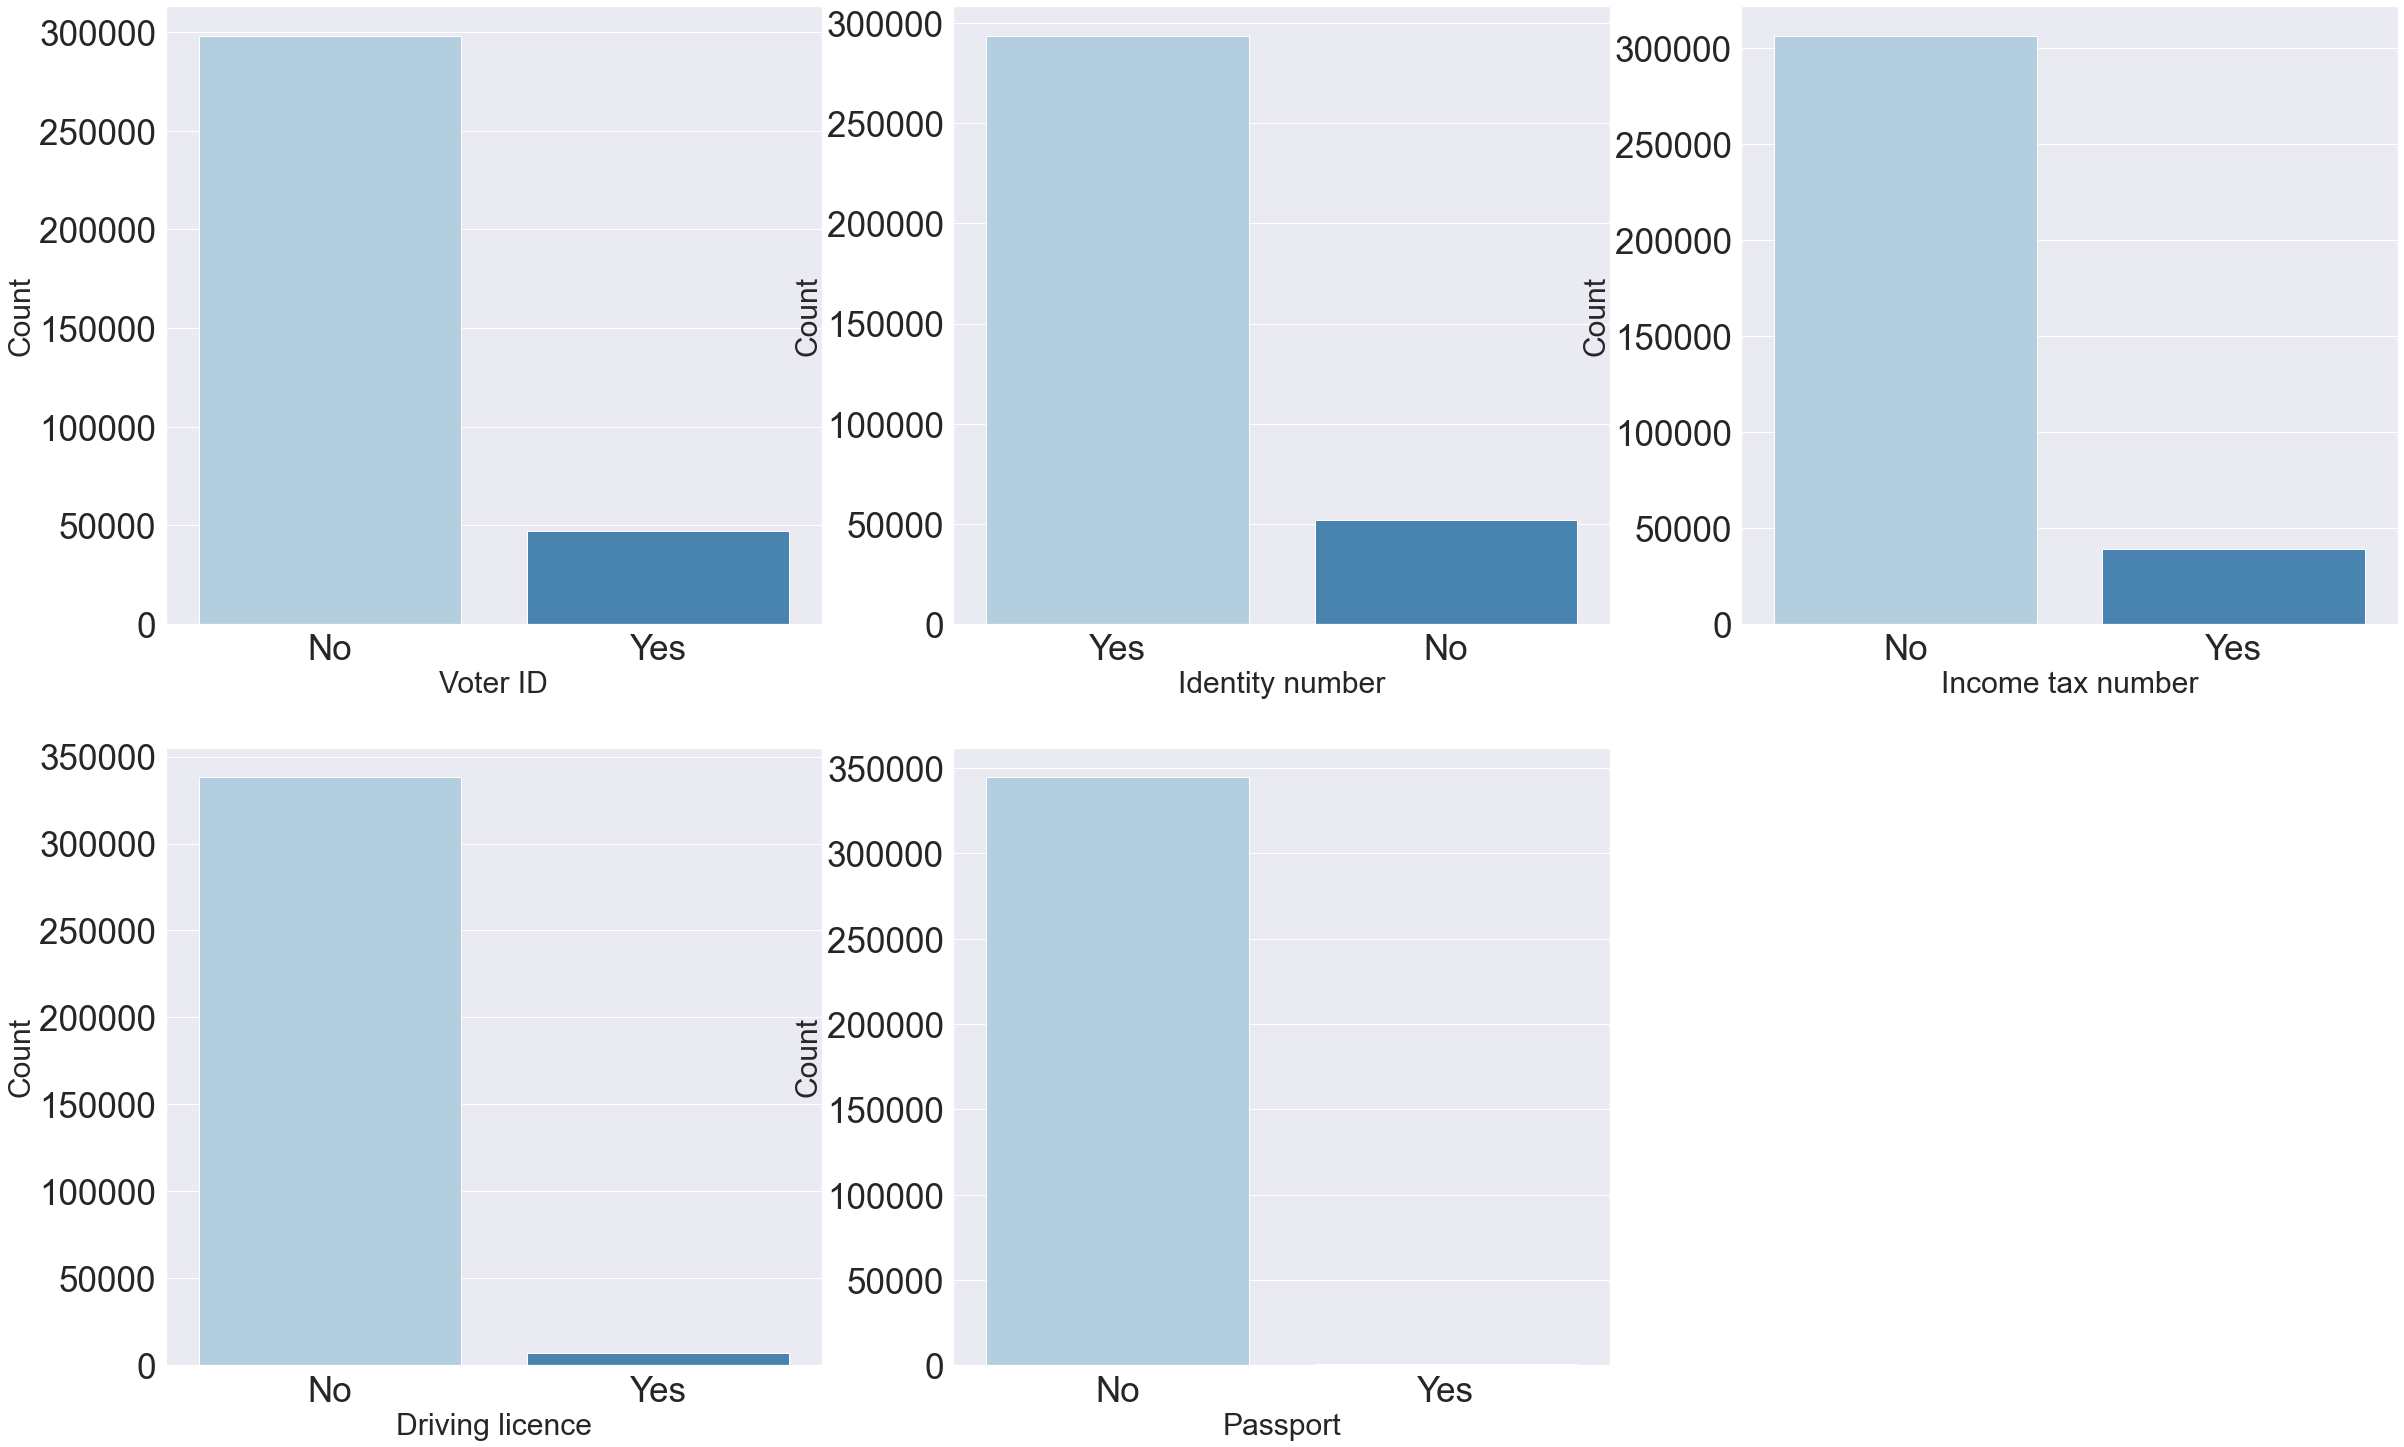

In [59]:
sns.set()
plt.rcParams['xtick.labelsize']=35
plt.rcParams['ytick.labelsize']=35
f, axes = plt.subplots(2, 3, figsize=(40, 25))
sns.countplot(x='VoterID_flag', ax=axes[0,0], data =data, palette='Blues')
ax=axes[0,0].set_ylabel('Count', fontsize=30)
ax=axes[0,0].set_xlabel('Voter ID', fontsize=30)

sns.countplot(x='Aadhar_flag',ax=axes[0,1], data = data, palette='Blues')
ax=axes[0,1].set_ylabel('Count', fontsize=30)
ax=axes[0,1].set_xlabel('Identity number', fontsize=30)

sns.countplot(x='PAN_flag',ax=axes[0,2], data = data, palette='Blues')
ax=axes[0,2].set_ylabel('Count', fontsize=30)
ax=axes[0,2].set_xlabel('Income tax number', fontsize=30)

sns.countplot(x='Driving_flag',ax=axes[1,0], data = data, palette='Blues')
ax=axes[1,0].set_ylabel('Count', fontsize=30)
ax=axes[1,0].set_xlabel('Driving licence', fontsize=30)

sns.countplot(x='Passport_flag',ax=axes[1,1], data = data, palette='Blues')
ax=axes[1,1].set_ylabel('Count', fontsize=30)
ax=axes[1,1].set_xlabel('Passport', fontsize=30)
f.delaxes(axes[1][2])
 

### Continuous variables

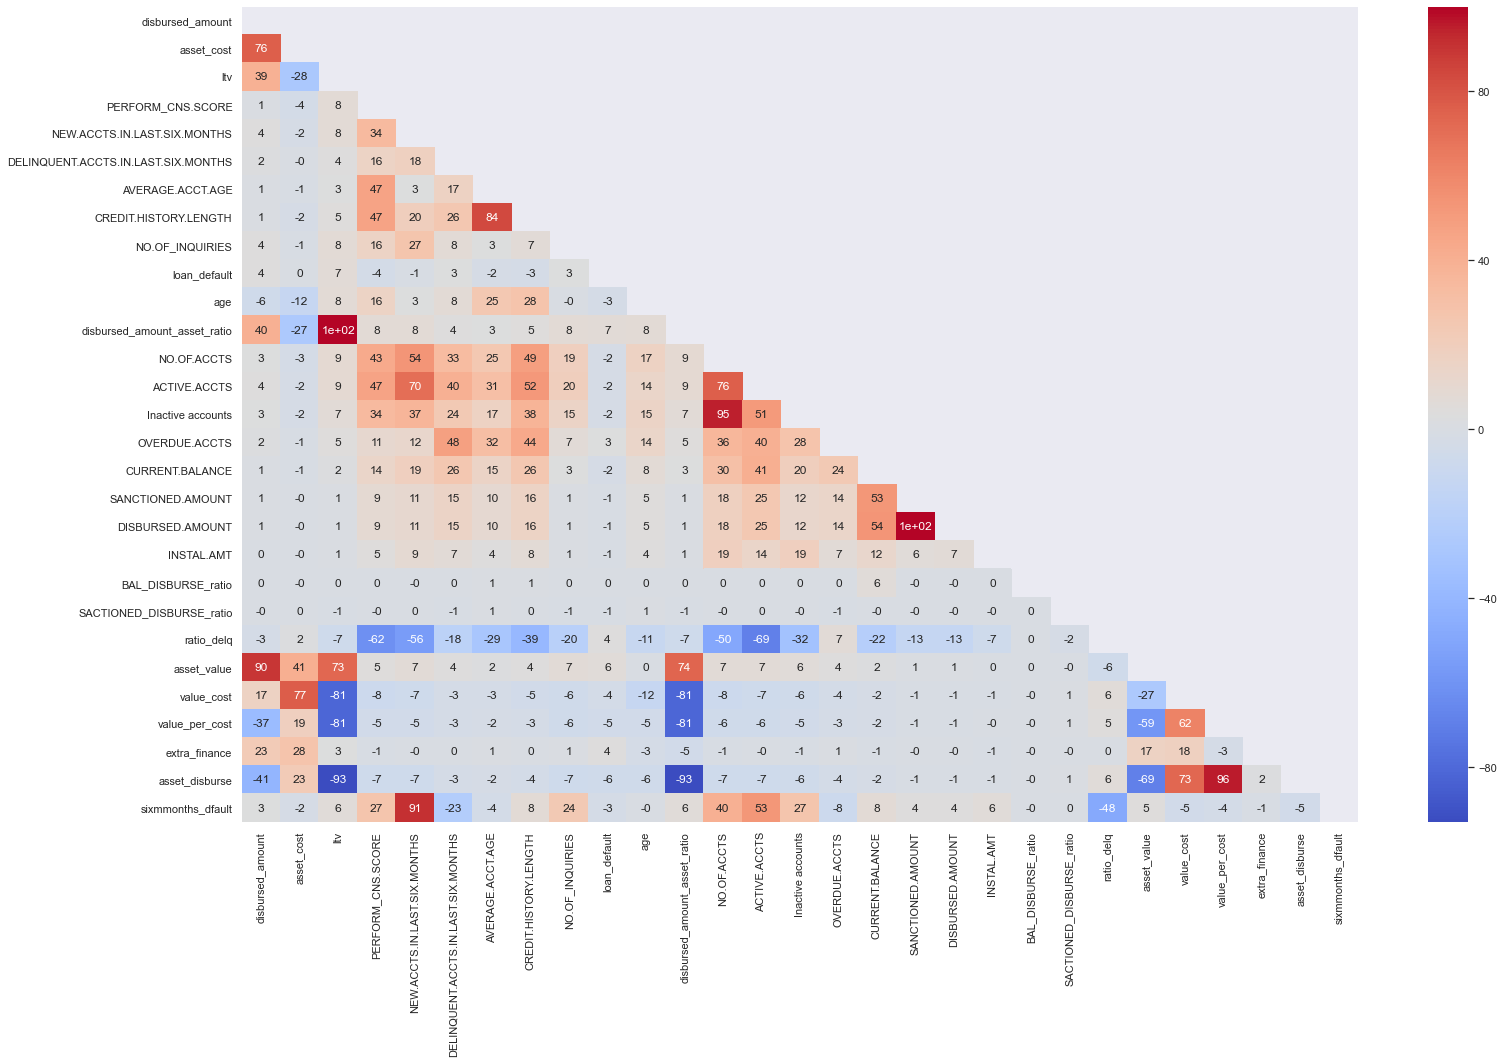

In [61]:
sns.set()
df=data[numerical]
plt.subplots(figsize=(25,15))
mask = np.triu(df.corr())
ax = sns.heatmap(round(df.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')

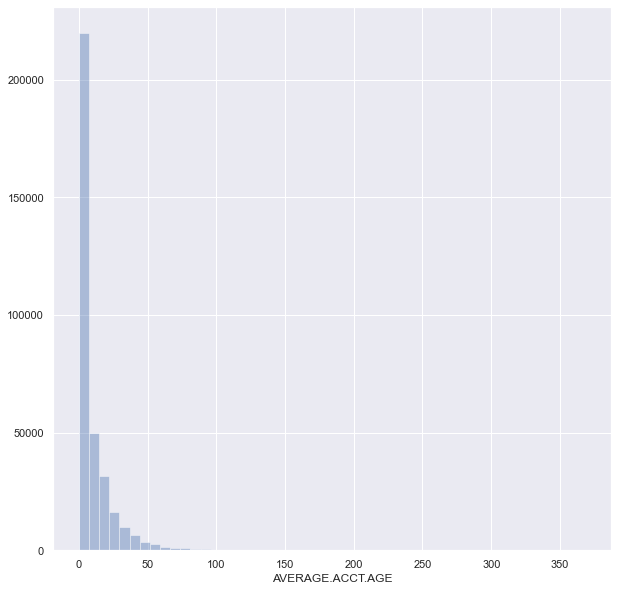

In [62]:
plt.subplots(figsize=(10,10))
ax = sns.distplot(data['AVERAGE.ACCT.AGE'], kde=False)

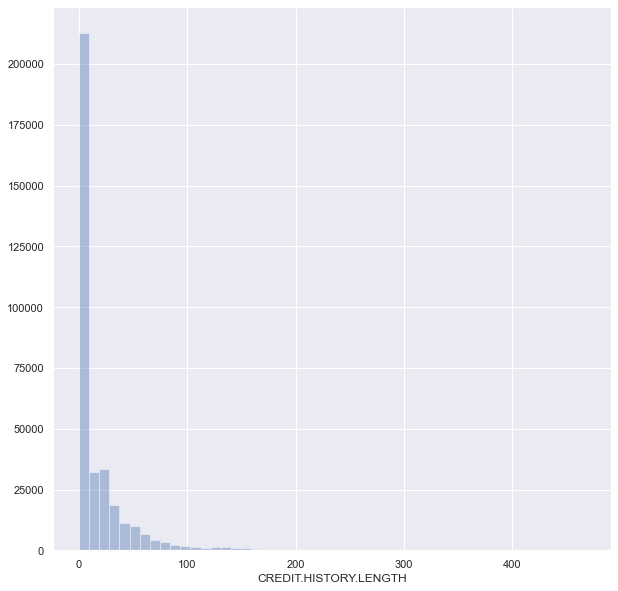

In [63]:
plt.subplots(figsize=(10,10))
ax = sns.distplot(data['CREDIT.HISTORY.LENGTH'], kde=False)

[Text(0.5, 0, 'Enquries done by the customer for loans'),
 Text(0, 0.5, 'Count')]

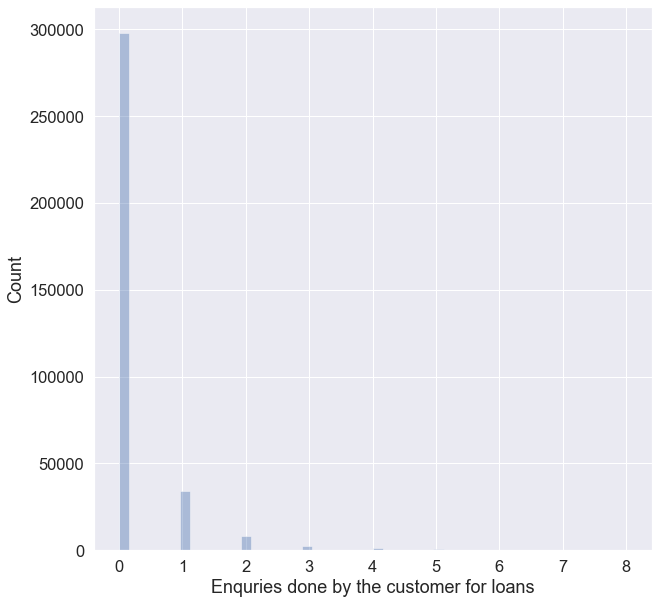

In [64]:
sns.set()
sns.set(font_scale=1.5)
plt.subplots(figsize=(10,10))
t=data[data['NO.OF_INQUIRIES']<9]['NO.OF_INQUIRIES']
ax = sns.distplot(t, kde=False)
ax.set(xlabel='Enquries done by the customer for loans', ylabel='Count')

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Frequency')]

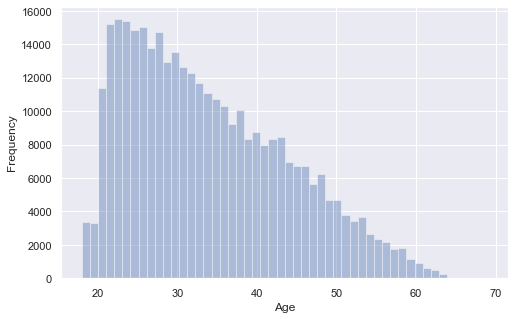

In [65]:
sns.set()
plt.subplots(figsize=(8,5))
ax = sns.distplot(data['age'], kde=False)
data['age'].value_counts(normalize=True)
ax.set(xlabel='Age', ylabel='Frequency')


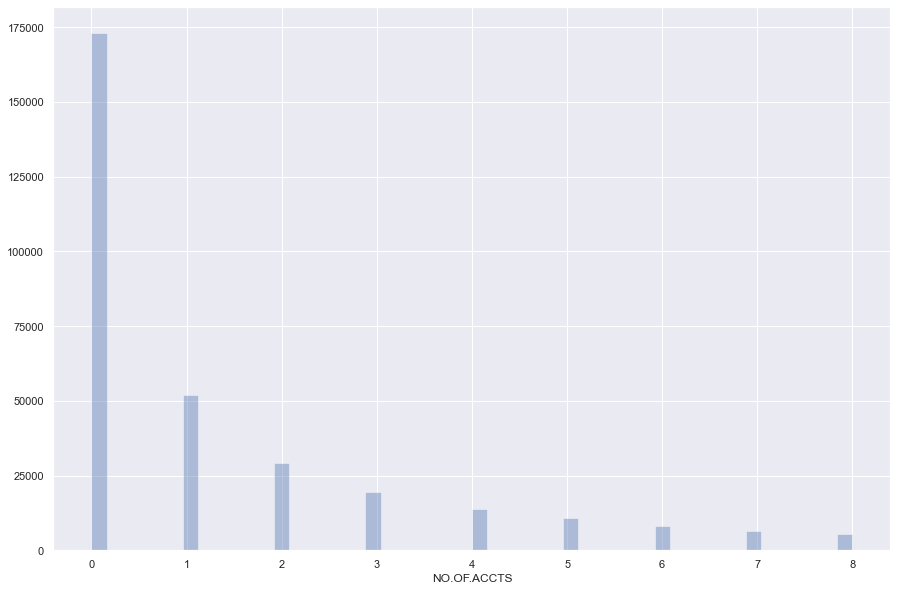

In [66]:
sns.set()
plt.subplots(figsize=(15,10))
t=data[data['NO.OF.ACCTS']<9]['NO.OF.ACCTS']
ax = sns.distplot(t, kde=False)

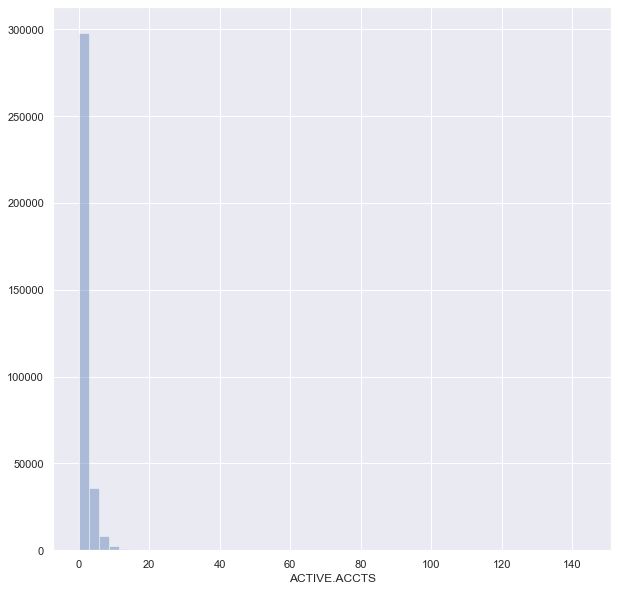

In [67]:
sns.set()
plt.subplots(figsize=(10,10))
ax = sns.distplot(data['ACTIVE.ACCTS'], kde=False)

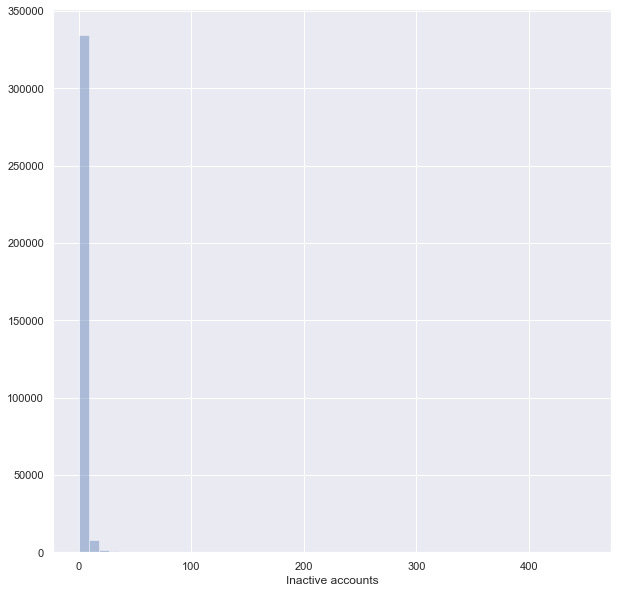

In [68]:
sns.set()
plt.subplots(figsize=(10,10))
ax = sns.distplot(data['Inactive accounts'], kde=False)

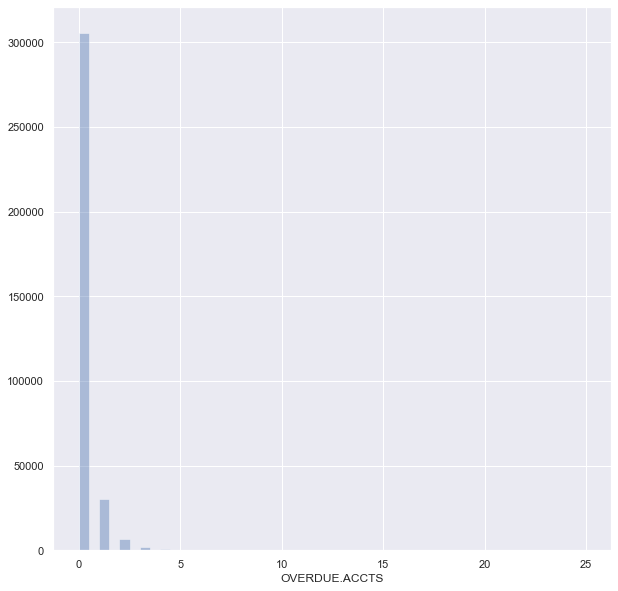

In [69]:
sns.set()
plt.subplots(figsize=(10,10))
ax = sns.distplot(data['OVERDUE.ACCTS'], kde=False)

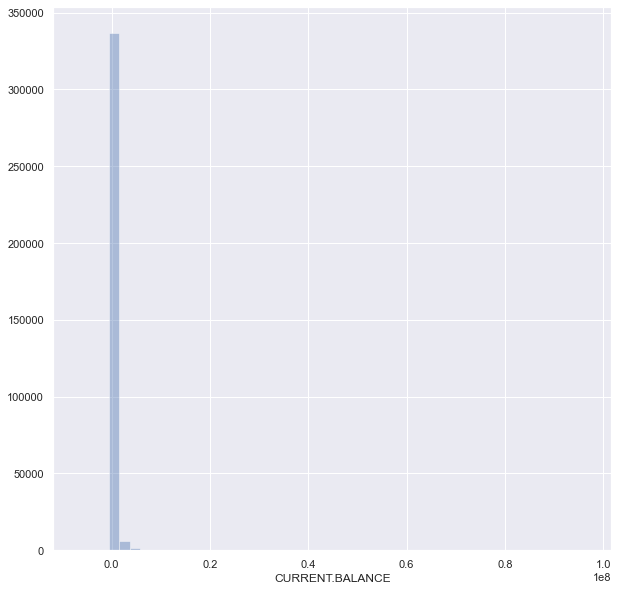

In [70]:
sns.set()
plt.subplots(figsize=(10,10))
ax = sns.distplot(data['CURRENT.BALANCE'], kde=False)

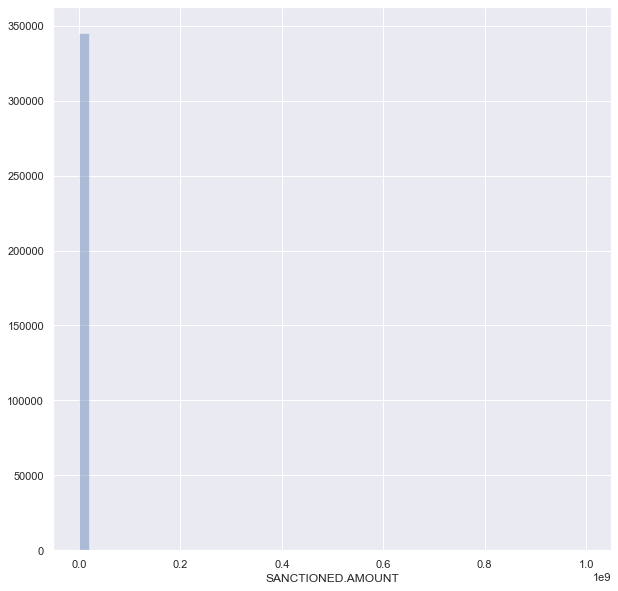

In [71]:
sns.set()
plt.subplots(figsize=(10,10))
ax = sns.distplot(data['SANCTIONED.AMOUNT'], kde=False)

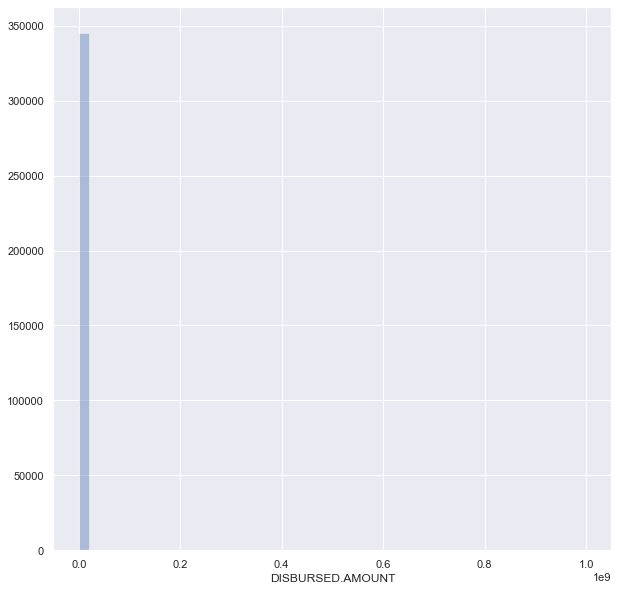

In [72]:
sns.set()
plt.subplots(figsize=(10,10))
ax = sns.distplot(data['DISBURSED.AMOUNT'], kde=False)

[Text(0.5, 0, 'Performance score'), Text(0, 0.5, 'Frequency')]

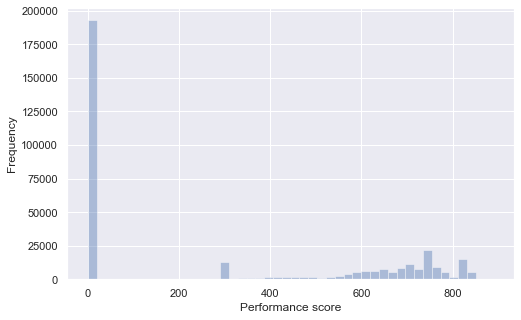

In [73]:
sns.set()
plt.subplots(figsize=(8,5))
ax = sns.distplot(data['PERFORM_CNS.SCORE'], kde=False)
ax.set(xlabel='Performance score', ylabel='Frequency')

## Multivariate visualisation

In [74]:
def ff(df):
    df.columns = ["_".join(x) for x in df.columns.ravel()]
    df=df.reset_index()
    #df=df.sort_values(by="asset_cost_categorie")
    return df

In [75]:
df1=data.groupby('Employment.Type').agg({'loan_default': ['sum', 'mean', 'count']}) 
df2=data.groupby('Aadhar_flag').agg({'loan_default': ['sum', 'mean', 'count']})  
df3=data.groupby('PAN_flag').agg({'loan_default': ['sum', 'mean', 'count']})  
df4=data.groupby('VoterID_flag').agg({'loan_default': ['sum', 'mean', 'count']})  
df5=data.groupby('Driving_flag').agg({'loan_default': ['sum', 'mean', 'count']})
df6=data.groupby('Passport_flag').agg({'loan_default': ['sum', 'mean', 'count']})  

In [76]:
df1=ff(df1)
df2=ff(df2)
df3=ff(df3)
df4=ff(df4)
df5=ff(df5)
df6=ff(df6)

In [77]:
l=['Employment.Type','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag']
d=[df1,df2,df3,df4,df5,df6]
for i, j in zip(l, d):
    j[i]=j[i].replace('1', "Yes")
    j[i]=j[i].replace('0', "No")



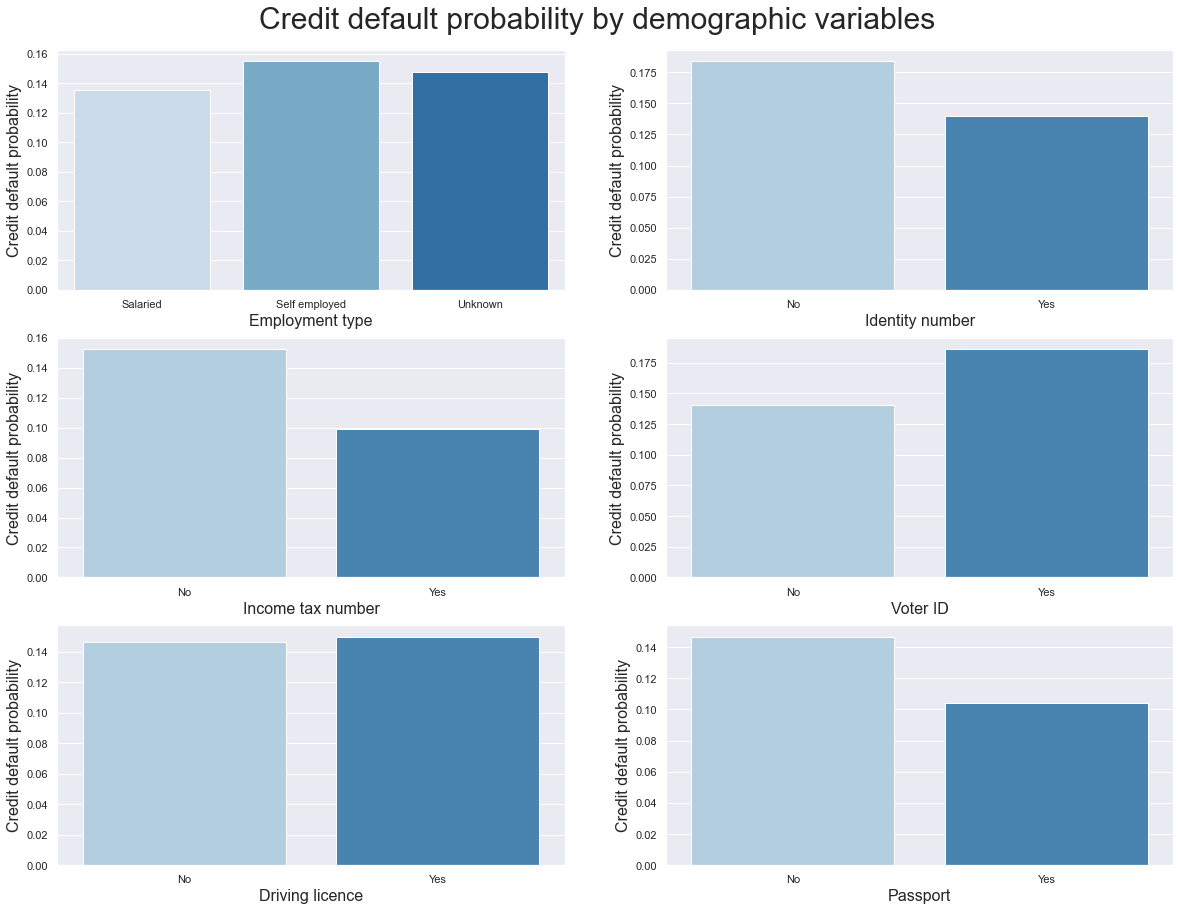

In [78]:
sns.set()
f, axes = plt.subplots(3, 2, figsize=(20, 15))
f.suptitle('Credit default probability by demographic variables', fontsize=30,ha ='center', y=0.92)
sns.barplot(x='Employment.Type', y='loan_default_mean',ax=axes[0,0], data = df1, palette='Blues')
ax=axes[0,0].set_ylabel('Credit default probability', fontsize=16)
ax=axes[0,0].set_xlabel('Employment type', fontsize=16)

sns.barplot(x='Aadhar_flag', y='loan_default_mean',ax=axes[0,1], data = df2, palette='Blues')
ax=axes[0,1].set_ylabel('Credit default probability', fontsize=16)
ax=axes[0,1].set_xlabel('Identity number', fontsize=16)

sns.barplot(x='PAN_flag', y='loan_default_mean',ax=axes[1,0], data = df3, palette='Blues')
ax=axes[1,0].set_ylabel('Credit default probability', fontsize=16)
ax=axes[1,0].set_xlabel('Income tax number', fontsize=16)

sns.barplot(x='VoterID_flag', y='loan_default_mean',ax=axes[1,1], data = df4, palette='Blues')
ax=axes[1,1].set_ylabel('Credit default probability', fontsize=16)
ax=axes[1,1].set_xlabel('Voter ID', fontsize=16)

sns.barplot(x='Driving_flag', y='loan_default_mean',ax=axes[2,0], data = df5, palette='Blues')
ax=axes[2,0].set_ylabel('Credit default probability', fontsize=16)
ax=axes[2,0].set_xlabel('Driving licence', fontsize=16)

sns.barplot(x='Passport_flag', y='loan_default_mean',ax=axes[2,1], data = df6, palette='Blues')
ax=axes[2,1].set_ylabel('Credit default probability', fontsize=16)
ax=axes[2,1].set_xlabel('Passport', fontsize=16)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-4.215e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: t-test independent samples with Bonferroni correction, P_val=2.788e-01 stat=-1.083e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: t-test independent samples with Bonferroni correction, P_val=4.516e-141 stat=-2.530e+01


(<AxesSubplot:xlabel='Loan Default', ylabel='Disbursed Amount'>,
 [<statannot.StatResult.StatResult at 0x1a25f21668>])

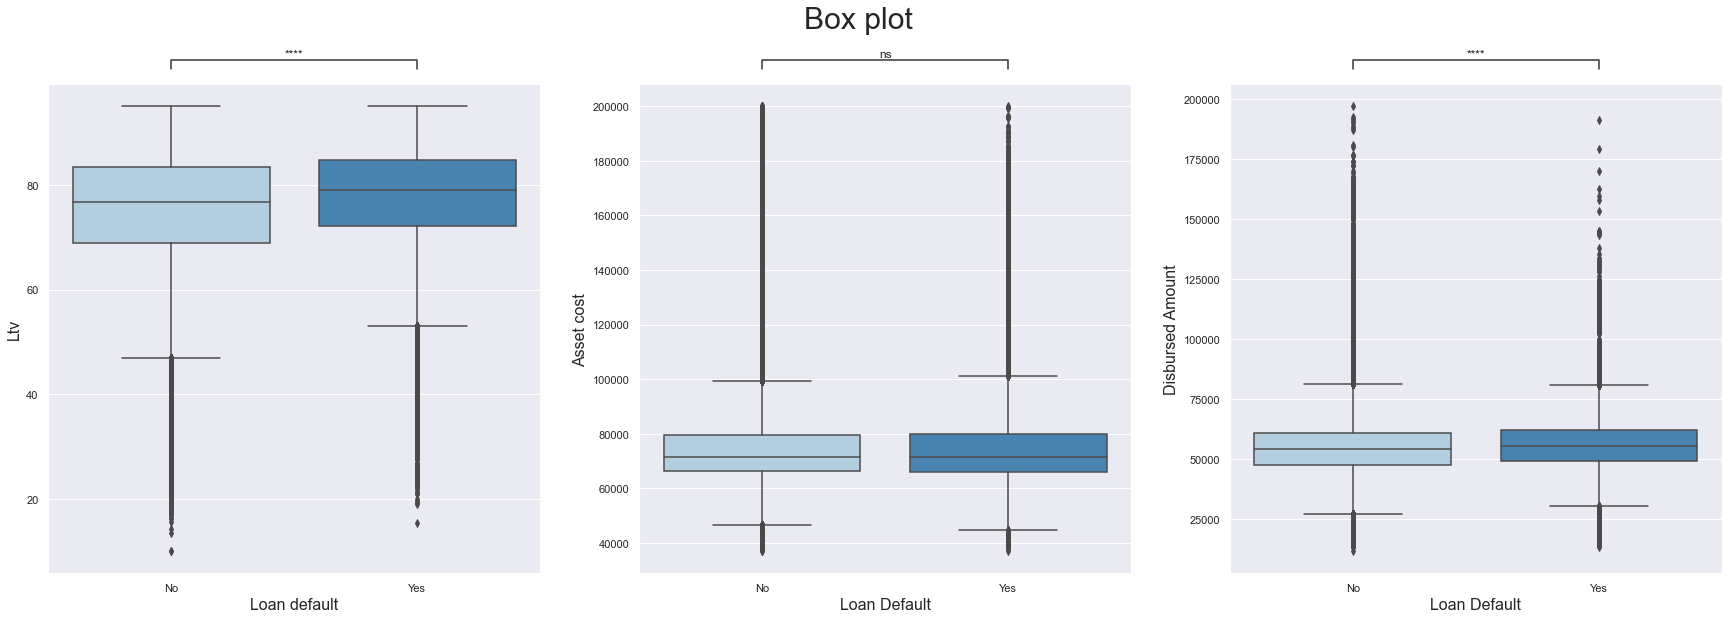

In [79]:
sns.set()
f, axes = plt.subplots(1,3, figsize=(30, 9))
f.suptitle('Box plot' , fontsize=30,ha ='center', y=1.0)
sns.boxplot(x="loan_default_str", y="ltv", data=data, palette='Blues',ax=axes[0])
axes[0].set_ylabel('Ltv', fontsize=16)
axes[0].set_xlabel('Loan default', fontsize=16)
add_stat_annotation(axes[0], data=data, x="loan_default_str", y="ltv",
                    box_pairs=[('Yes', 'No')],
                    test='t-test_ind', loc='outside', text_format='star', verbose=2)

sns.boxplot(x="loan_default_str", y="asset_cost", data=data[data['asset_cost']<200000], palette='Blues',ax=axes[1])
axes[1].set_ylabel('Asset cost', fontsize=16)
axes[1].set_xlabel('Loan Default', fontsize=16)
add_stat_annotation(axes[1], data=data, x="loan_default_str", y="asset_cost",
                    box_pairs=[('Yes', 'No')],
                    test='t-test_ind', loc='outside', text_format='star', verbose=2)

sns.boxplot(x="loan_default_str", y="disbursed_amount", data=data[data['disbursed_amount']<200000], palette='Blues',ax=axes[2])
axes[2].set_ylabel('Disbursed Amount', fontsize=16)
axes[2].set_xlabel('Loan Default', fontsize=16)
add_stat_annotation(axes[2], data=data, x="loan_default_str", y="disbursed_amount",
                    box_pairs=[('Yes', 'No')],
                    test='t-test_ind', loc='outside', text_format='star', verbose=2)



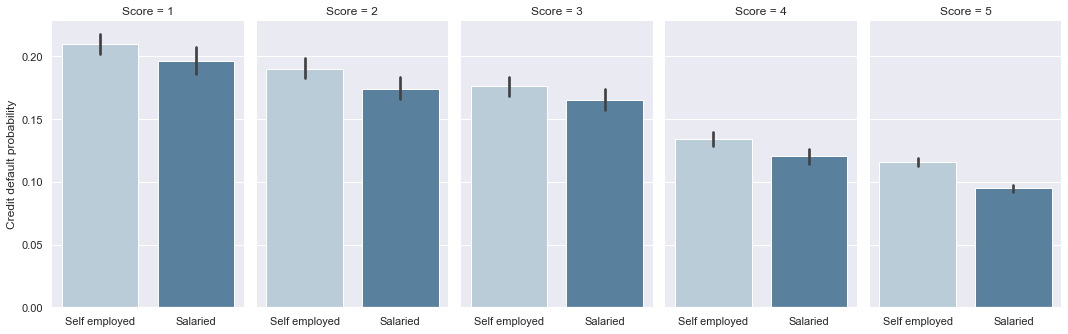

In [80]:
sns.set()
data1=data.rename(columns={'PERFORM_CNS.SCORE.DESCRIPTION':'Score'})
data1['loan_default']=data1['loan_default'].replace("Yes",1)
data1['loan_default']=data1['loan_default'].replace("NO",0)
data1=data1[data1['Score']!="0"]
g = sns.catplot(x="Employment.Type", y="loan_default", col="Score",
                data=data1[data1['Employment.Type']!="Unknown"], saturation=.5,
                kind="bar", aspect=.6,  palette='Blues')
(g.set_axis_labels("", "Credit default probability")

  .despine(left=True))

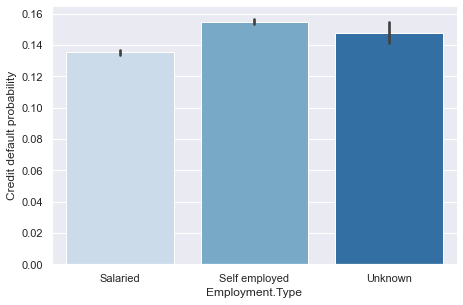

In [81]:
#plt.subplots(figsize=(15,5))
sns.set()
#plt.figure(figsize=(150,10))

ax=sns.catplot(x="Employment.Type", y="loan_default", data=data,
                 kind="bar", palette="Blues",height=4.4, aspect=1.5)
ax.set(xlabel='Employment.Type', ylabel='Credit default probability')



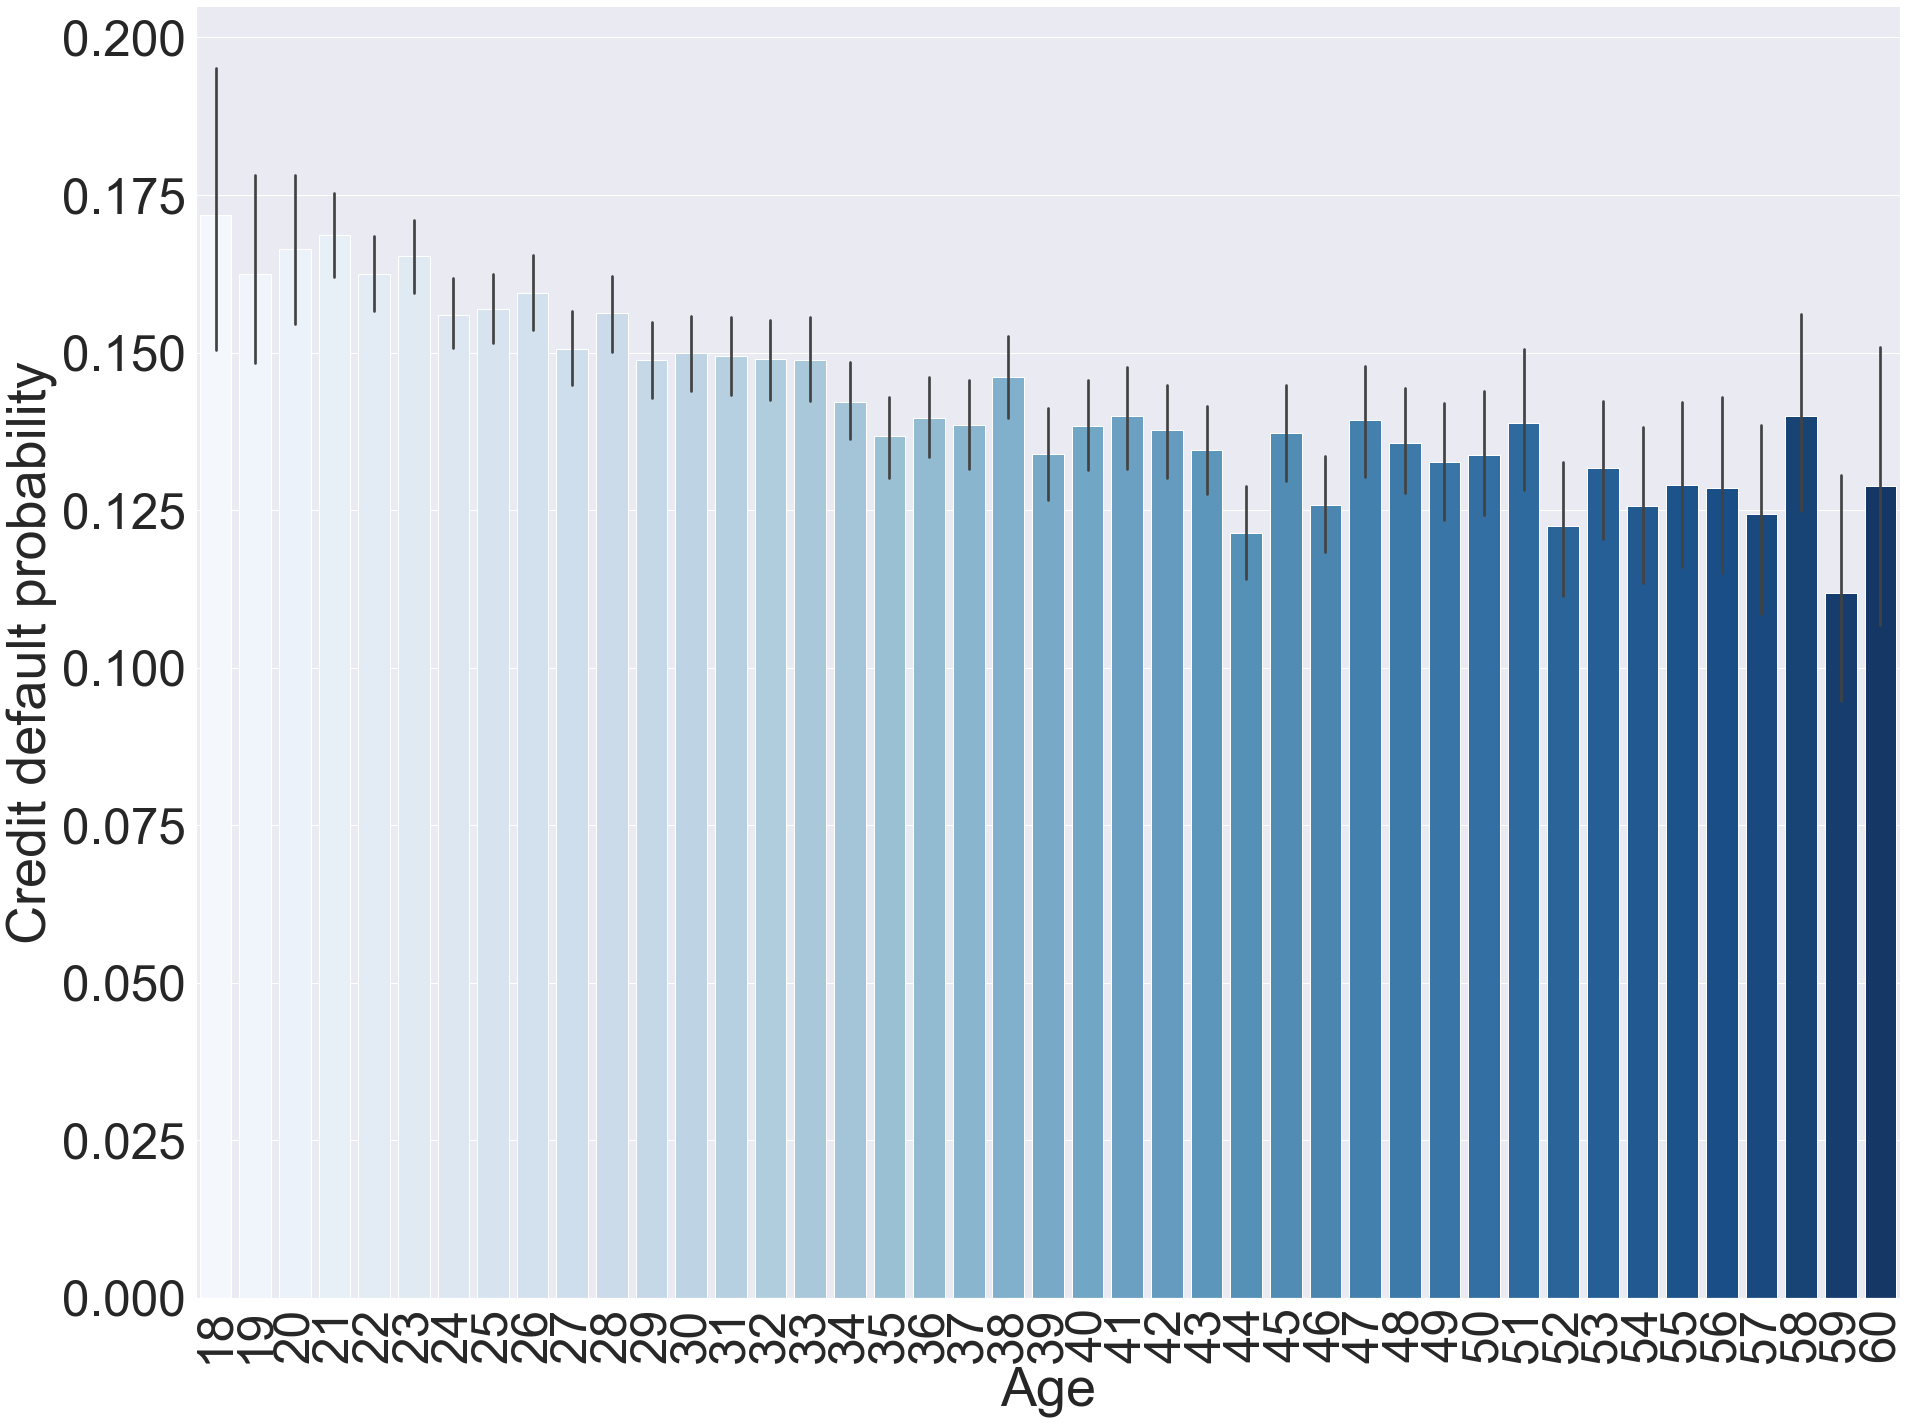

In [82]:
sns.set()
sns.set(font_scale=4.5)
data['loan_default']=data['loan_default'].replace("Yes",1)
data['loan_default']=data['loan_default'].replace("NO",0)
g = sns.catplot(x="age", y="loan_default", data=data[data['age']<61],
                height=6, kind="bar", palette="Blues")
g.set(xlabel='Age', ylabel='Credit default probability')
g.fig.set_size_inches(65,40)
g.set_xticklabels( rotation=90)


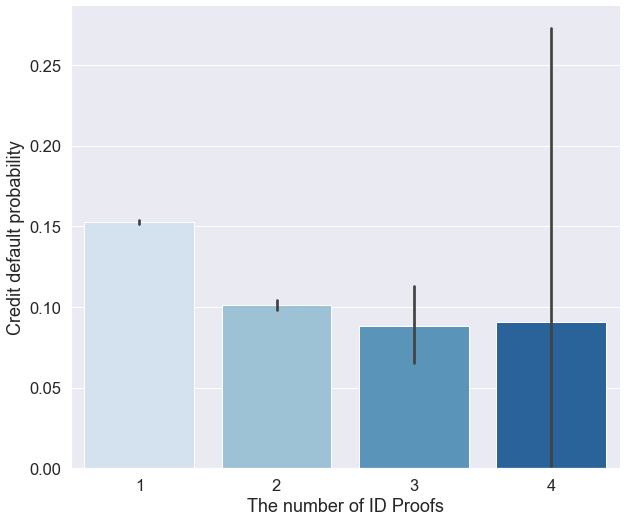

In [83]:
sns.set()
#plt.subplots(figsize=(8,5))
sns.set(font_scale=1.5)
g = sns.catplot(x="total_identiy", y="loan_default", data=data,
                height=6, kind="bar", palette="Blues")
g.set(xlabel='The number of ID Proofs', ylabel='Credit default probability')
g.fig.set_size_inches(10,8)


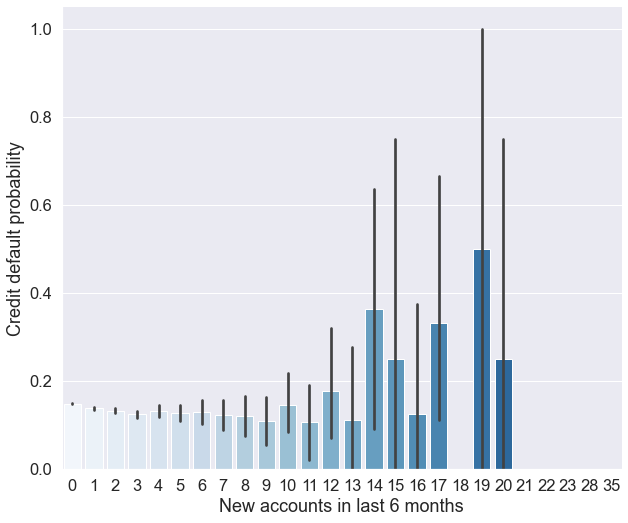

In [84]:
data['loan_default']=data['loan_default'].replace("Yes",1)
data['loan_default']=data['loan_default'].replace("NO",0)
g = sns.catplot(x="NEW.ACCTS.IN.LAST.SIX.MONTHS", y="loan_default", data=data,
                height=6, kind="bar", palette="Blues")
g.set(xlabel='New accounts in last 6 months', ylabel='Credit default probability')
g.fig.set_size_inches(10,8)

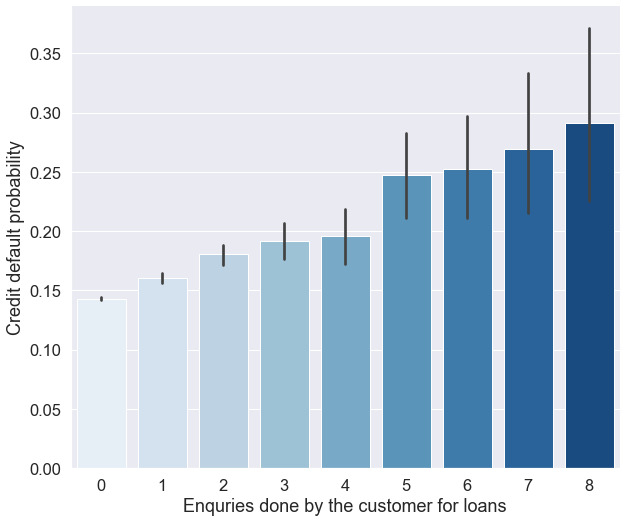

In [85]:
sns.set()
sns.set(font_scale=1.5)
data['loan_default']=data['loan_default'].replace("Yes",1)
data['loan_default']=data['loan_default'].replace("NO",0)
g = sns.catplot(x="NO.OF_INQUIRIES", y="loan_default", data=data[data['NO.OF_INQUIRIES']<9],
                height=6, kind="bar", palette="Blues")
g.set(xlabel='Enquries done by the customer for loans', ylabel='Credit default probability')
g.fig.set_size_inches(10,8)

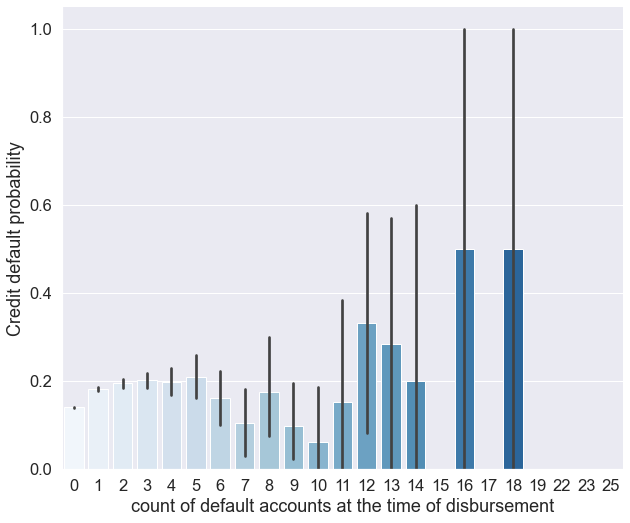

In [86]:
data['loan_default']=data['loan_default'].replace("Yes",1)
data['loan_default']=data['loan_default'].replace("NO",0)
g = sns.catplot(x="OVERDUE.ACCTS", y="loan_default", data=data,
                height=6, kind="bar", palette="Blues")
g.set(xlabel='count of default accounts at the time of disbursement', ylabel='Credit default probability')
g.fig.set_size_inches(10,8)

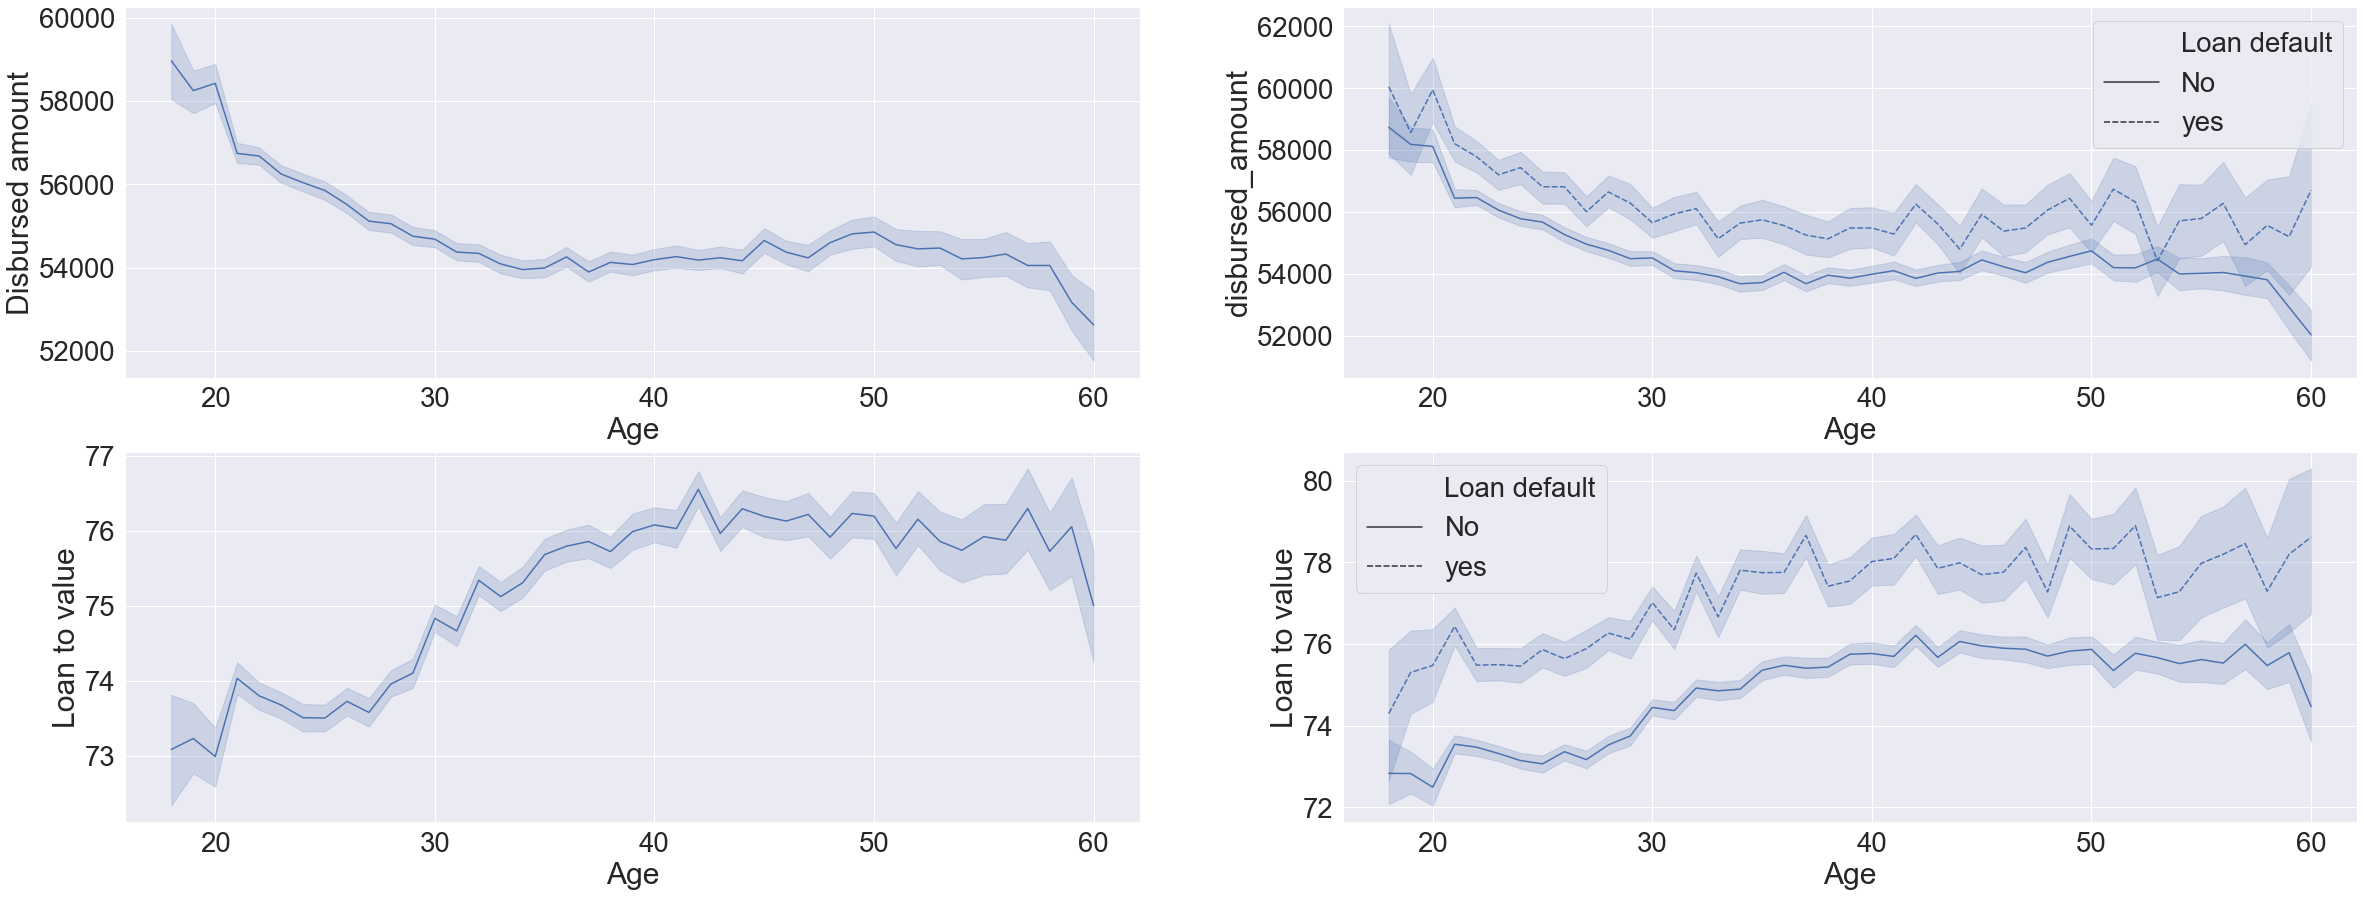

In [87]:
data2=data[data['age']<61]
data2=data2[data2['disbursed_amount']<200000]
data2["Loan default"]=data2["loan_default"].replace(0,"No").replace(1, "yes")
sns.set(font_scale=2.5)
f, axes = plt.subplots(2, 2, figsize=(40, 15))

#f.suptitle('Credit default probability by demographic variables', fontsize=30,ha ='center', y=0.92)

sns.lineplot(x='age', y='disbursed_amount',ax=axes[0,0], data = data2, palette='Blues')
ax=axes[0,0].set_ylabel('Disbursed amount')
ax=axes[0,0].set_xlabel('Age')

sns.lineplot(x='age', y='disbursed_amount',ax=axes[0,1], data = data2, palette='Blues',style="Loan default")
ax=axes[0,1].set_ylabel('disbursed_amount')
ax=axes[0,1].set_xlabel('Age')

sns.lineplot(x='age', y='ltv',ax=axes[1,0], data = data2, palette='Blues')
ax=axes[1,0].set_ylabel('Loan to value')
ax=axes[1,0].set_xlabel('Age')

sns.lineplot(x='age', y='ltv',ax=axes[1,1], data = data2, palette='Blues',style="Loan default")
ax=axes[1,1].set_ylabel('Loan to value')
ax=axes[1,1].set_xlabel('Age')

In [88]:
data_1=data2[data2['Employment.Type']!='Unknown']
data_1["Loan default"]=data_1["loan_default"].replace(0,"No").replace(1, "Yes")

/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 2880x1080 with 0 Axes>

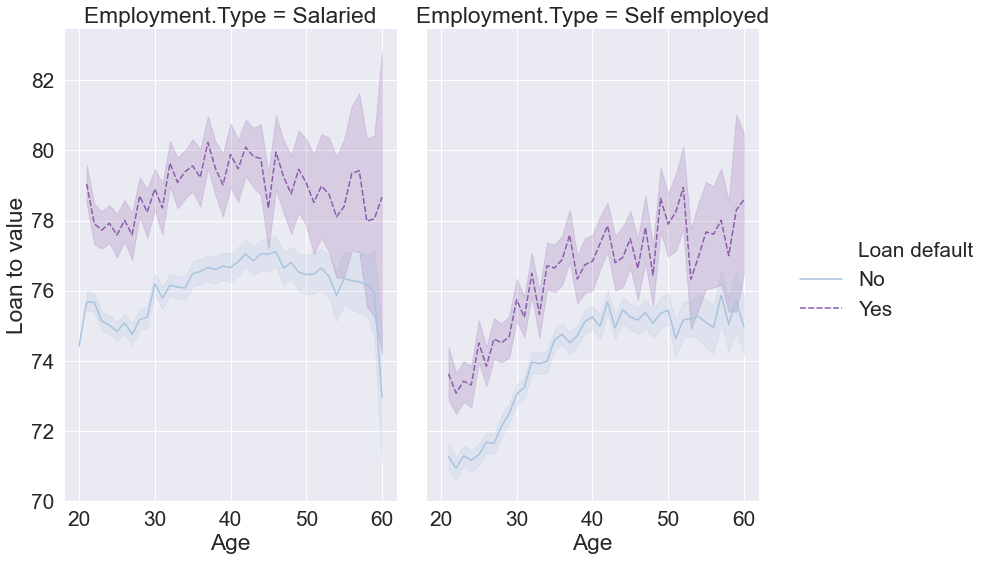

In [89]:
sns.set(font_scale=1.9)
plt.figure(figsize=(40, 15))
h=sns.relplot(x='age', y='ltv', data = data_1, palette='BuPu',col="Employment.Type", hue="Loan default",
              kind="line", style="Loan default")
h.set(xlabel='Age', ylabel='Loan to value')
h.fig.set_size_inches(15,10)

<Figure size 2880x1080 with 0 Axes>

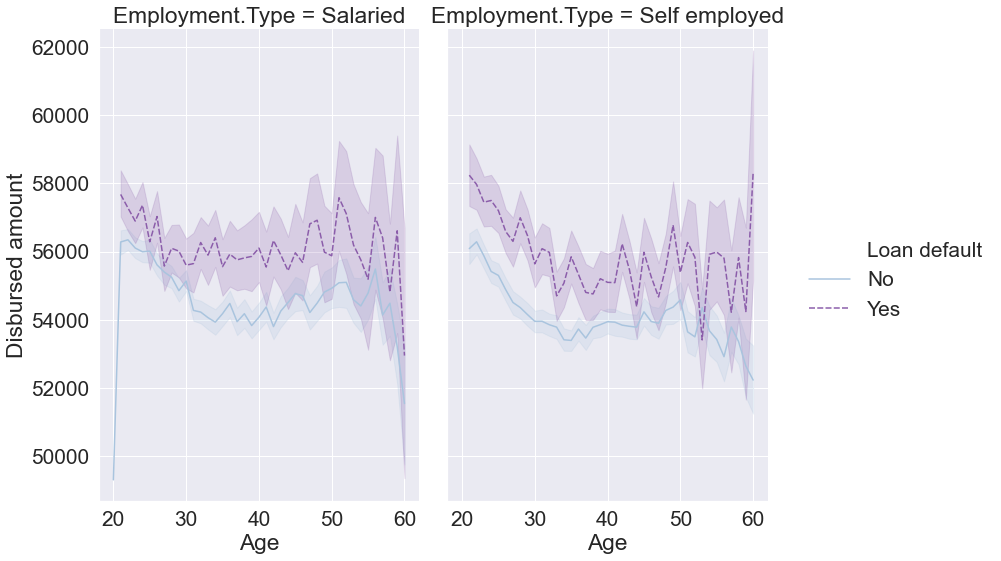

In [90]:
sns.set(font_scale=1.9)
plt.figure(figsize=(40, 15))
h=sns.relplot(x='age', y='disbursed_amount', data = data_1, palette='BuPu',col="Employment.Type", hue="Loan default",
              kind="line", style="Loan default")
h.set(xlabel='Age', ylabel='Disbursed amount')
h.fig.set_size_inches(15,10)

In [91]:
df=data.groupby('branch_id').agg({'loan_default': ['sum', 'mean', 'count']}) 
df.columns = ["_".join(x) for x in df.columns.ravel()]
df=df.reset_index()

In [92]:
df = df.sort_values('loan_default_mean')

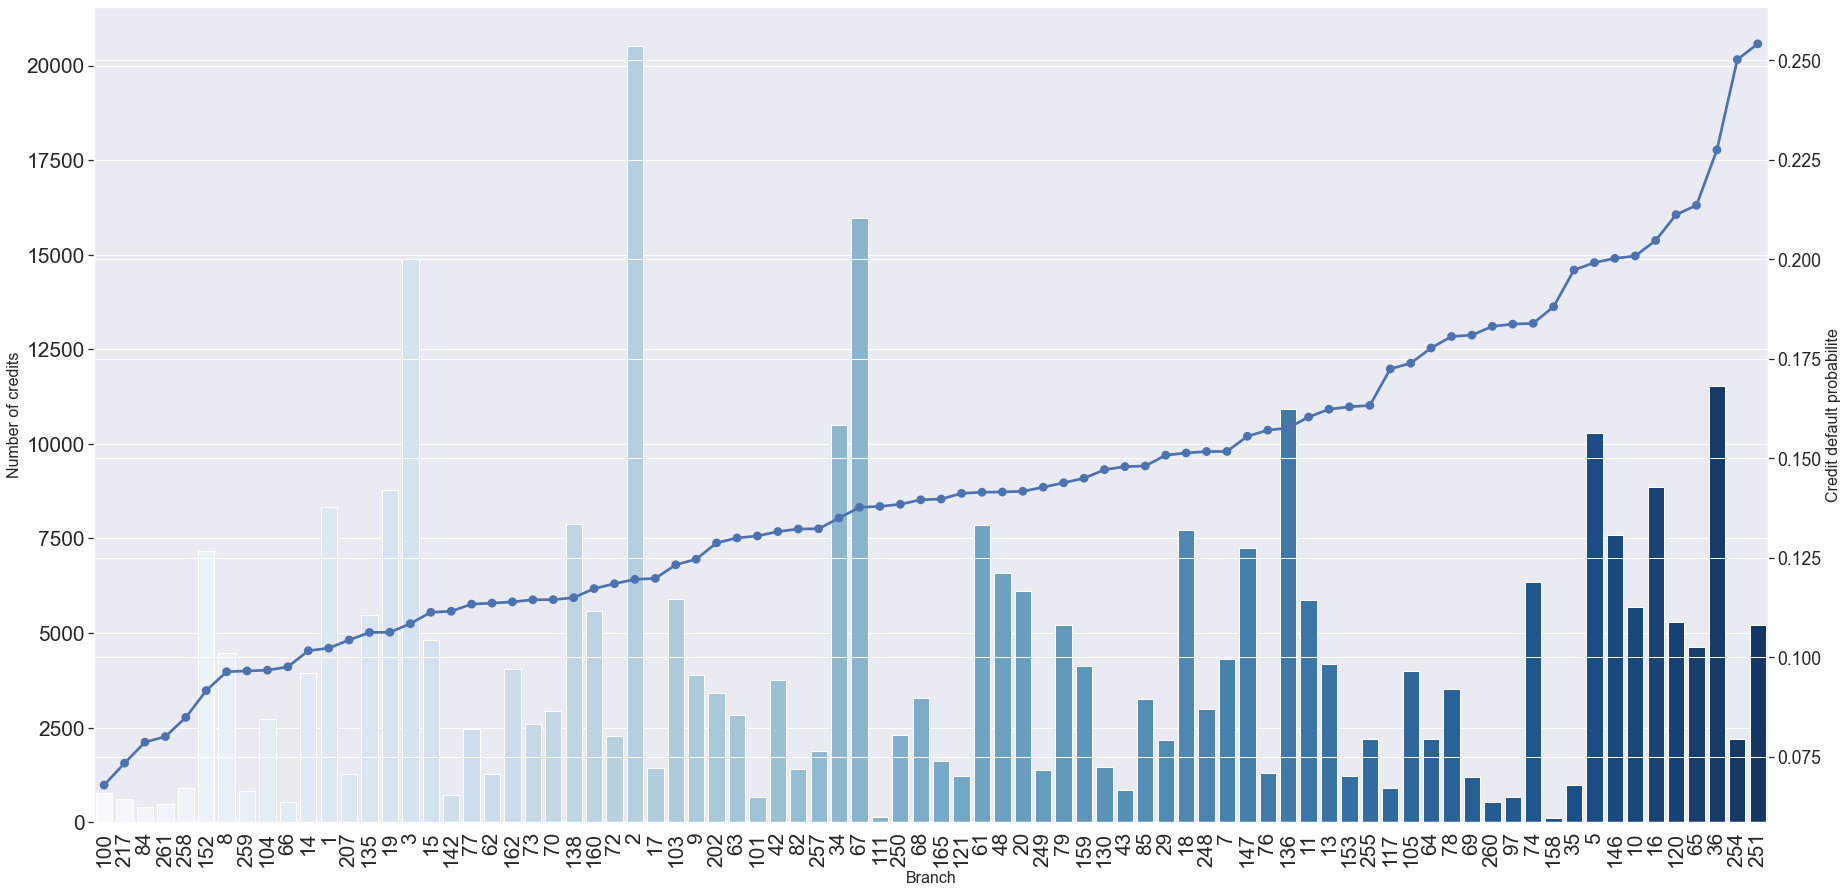

In [93]:
fig, ax1 = plt.subplots(figsize=(30,15))
#color = 'tab:green'
sns.set(font_scale=1.6)
#ax1.set_title('Credit default probabilite by branche', fontsize=16)
ax1 = sns.barplot(x='branch_id', y='loan_default_count', data = df,
                  palette='Blues',order=df.sort_values(by='loan_default_mean').branch_id)
ax1.set_ylabel('Number of credits', fontsize=16)
ax1.set_xlabel('Branch', fontsize=16)

ax1.tick_params(axis='y')
ax2 = ax1.twinx()
#color = 'tab:red'
ax2.set_ylabel('Credit default probabilite', fontsize=16)
ax2 = sns.pointplot(x='branch_id', y='loan_default_mean', data = df,
                    order=df.sort_values(by='loan_default_mean').branch_id)
ax2.set_ylabel('Credit default probabilite', fontsize=16)
ax2.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.show()

Text(0, 0.5, 'Credit default probability')

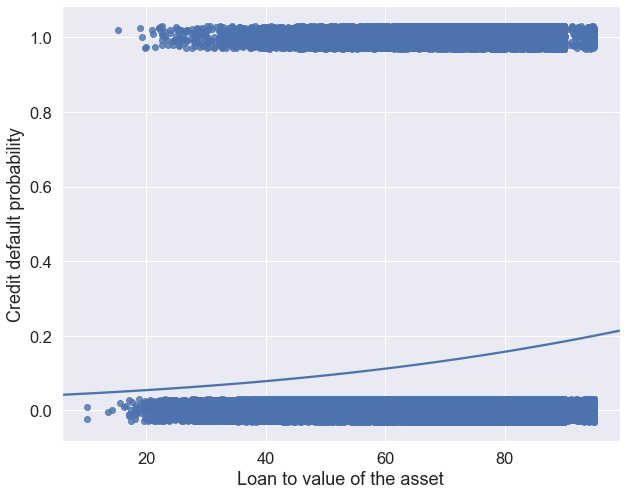

In [94]:
sns.set()
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,8))

ax = sns.regplot(x="ltv", y="loan_default", data=data,
                 logistic=True, n_boot=500, y_jitter=.03,scatter=True)
ax1.set_xlabel('Loan to value of the asset')
ax1.set_ylabel('Credit default probability')


Text(0, 0.5, 'Credit default probability')

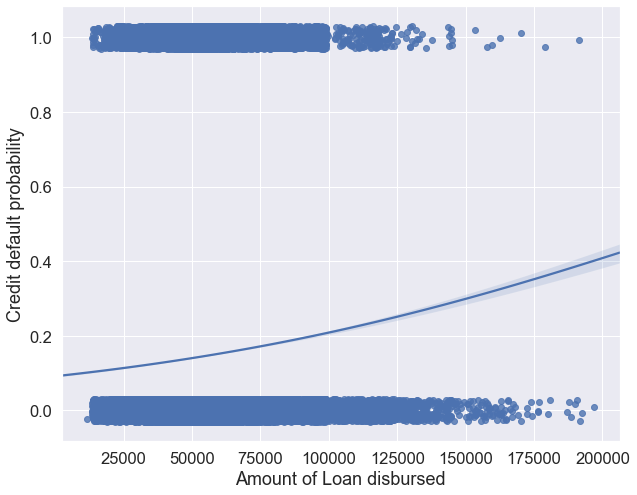

In [95]:
sns.set()
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,8))

ax = sns.regplot(x="disbursed_amount", y="loan_default", data=data[data['disbursed_amount']<200000.0],
                 logistic=True, n_boot=500, y_jitter=.03)
ax1.set_xlabel('Amount of Loan disbursed')
ax1.set_ylabel('Credit default probability')

Text(0, 0.5, 'Credit default probability')

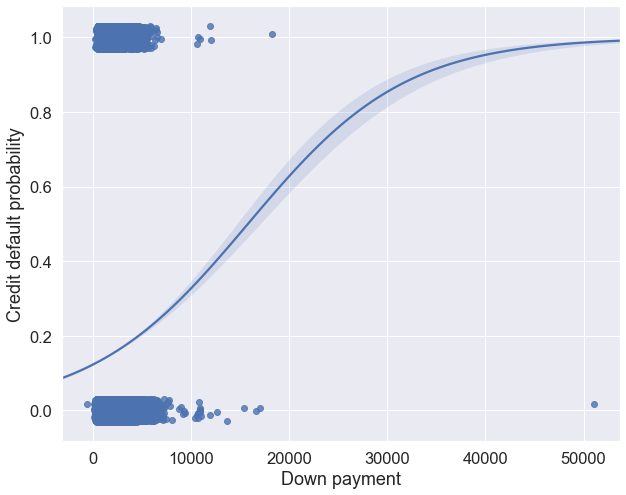

In [96]:
sns.set()
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,8))

ax = sns.regplot(x="extra_finance", y="loan_default", data=data,
                 logistic=True, n_boot=500, y_jitter=.03)
ax1.set_xlabel('Down payment')
ax1.set_ylabel('Credit default probability')

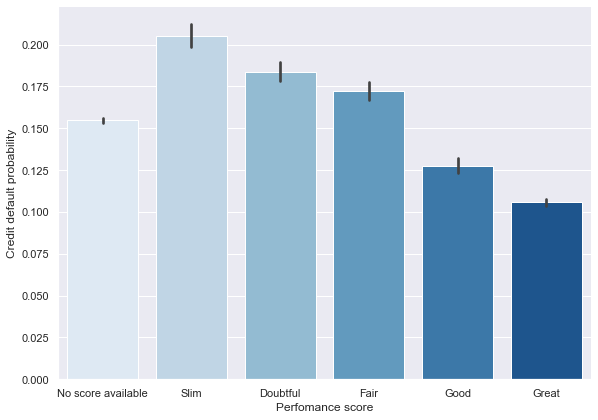

In [97]:
sns.set()
data1=data.rename(columns={'PERFORM_CNS.SCORE.DESCRIPTION_str':'Score'})
g = sns.catplot(x="Score", y="loan_default", data=data1,
                height=6, kind="bar", palette="Blues", 
                   order=["No score available",'Slim','Doubtful','Fair','Good','Great'])
g.set(xlabel='Perfomance score', ylabel='Credit default probability')
g.fig.set_size_inches(9,6)

<AxesSubplot:xlabel='Score', ylabel='count'>

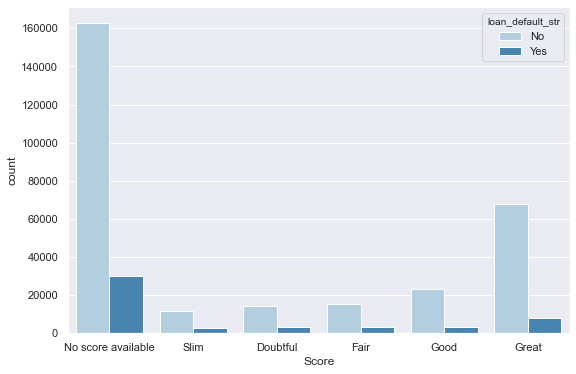

In [486]:
sns.set()
fig, ax =plt.subplots( figsize=(9, 6))
sns.countplot(data=data1, x='Score', hue='loan_default_str',order=["No score available",'Slim','Doubtful','Fair','Good','Great'], palette="Blues")

Text(0, 0.5, 'Credit default probability')

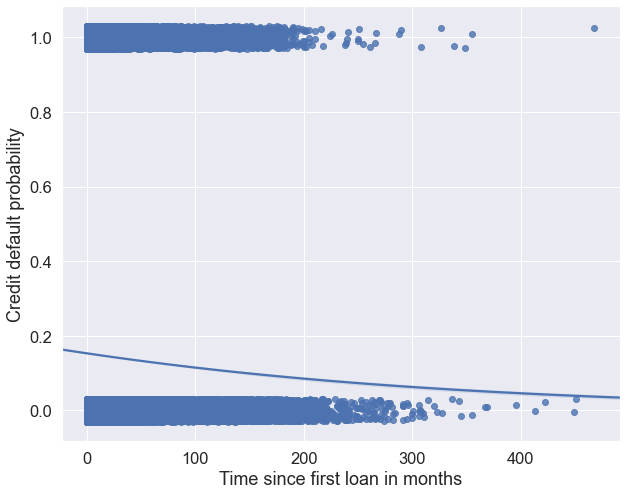

In [98]:
sns.set()
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,8))

ax = sns.regplot(x="CREDIT.HISTORY.LENGTH", y="loan_default", data=data,
                 logistic=True, n_boot=500, y_jitter=.03)
ax1.set_xlabel('Time since first loan in months')
ax1.set_ylabel('Credit default probability')

Text(0, 0.5, 'Credit default probability')

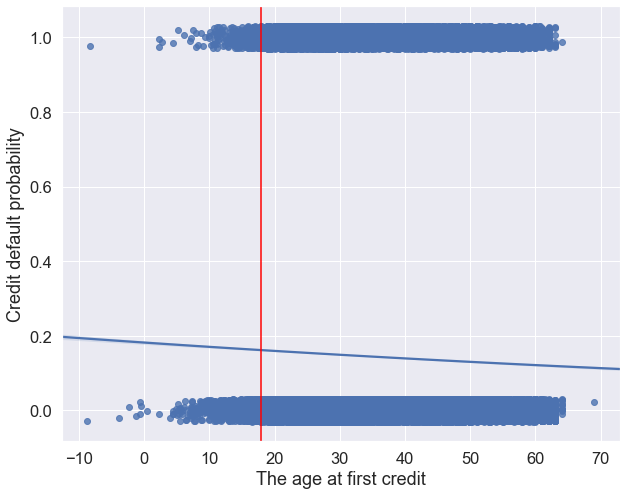

In [99]:
sns.set()
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,8))

ax = sns.regplot(x="age_at_first_kredit", y="loan_default", data=data,
                 logistic=True, n_boot=500, y_jitter=.03,scatter=True)
plt.axvline(x=18, color='red')
ax1.set_xlabel('The age at first credit')
ax1.set_ylabel('Credit default probability')

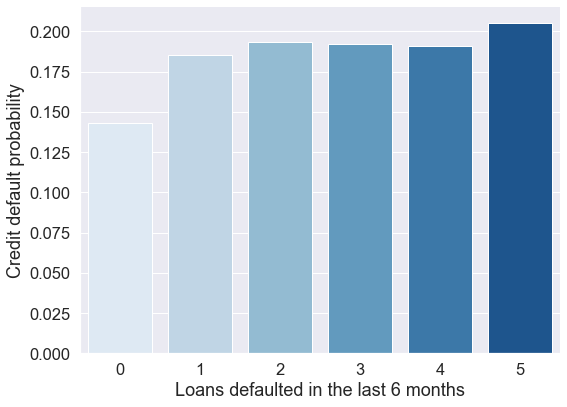

In [544]:
sns.set()
sns.set(font_scale=1.5)

g = sns.catplot(x="DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS", y="loan_default", 
                data=data[data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']<6],
                height=6, kind="bar", palette="Blues", ci=None)
g.set(xlabel='Loans defaulted in the last 6 months', ylabel='Credit default probability')
g.fig.set_size_inches(9,6)

# Machine Learning

## Preprocessing

In [117]:
X= loan.copy()

In [118]:
y=X['loan_default']

In [119]:
X.drop(['PERFORM_CNS.SCORE.DESCRIPTION', 'loan_default'], axis=1, inplace=True)

In [120]:
X['Missing Features'] = (X == 0).astype(int).sum(axis=1)

In [121]:
ff=['total_identiy','supplier_id','PAN_flag','Aadhar_flag','VoterID_flag',
    'Driving_flag','Passport_flag', 'branch_id', 'State_ID', 'manufacturer_id'
    , 'Employment.Type', 'Current_pincode_ID',"Employee_code_ID"]

In [122]:
X[ff]= X[ff].astype('str')

In [123]:
# split the data in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 276436 samples.
Testing set has 69110 samples.


In [124]:
numeric = X_train.dtypes != object
numeric_features = list(X_train.columns[numeric])

In [125]:
numeric = X_train.dtypes != object
numeric_features = list(X_train.columns[numeric])
categorical_features = list(X_train.columns[~numeric])

#X = X[categoric_features+numeric_features]

In [126]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [127]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('transf',PowerTransformer())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder( handle_unknown='ignore'))])

In [128]:
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbPipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])




## Simple baseline 

In [191]:
rf = Pipeline(steps=[('preprocessor', preprocessor), 
                     ('classifier',DummyClassifier(strategy="most_frequent"))])
#cross_val_score(rf,X_train, y_train, scoring="roc_auc", cv=5)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
y_pred_1 = rf.predict_proba(X_test)[:, 1]
print(f"ROC_AUC: { roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])}")
Dummy_calssifier=roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

Accuracy: 0.8514831428158008
Precision: 0.0
Recall: 0.0


/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC_AUC: 0.5


/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 0, 'Predicted label\n\nAUC=0.5000\nAccaurcy=0.8515\nPrecision=0.0000\nRecall=0.0000')

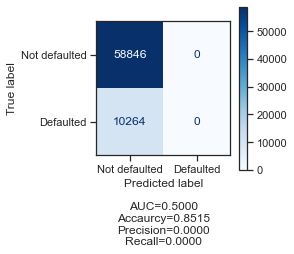

In [189]:
y_pred=rf.predict(X_test)
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.0)
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax,values_format='d')

plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, rf
                                          .predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))

## Logistic Regression

In [129]:
rf1 = Pipeline(steps=[('preprocessor', preprocessor), 
                     ('classifier', LogisticRegression(class_weight={0:1,1:7}, max_iter=5000))])
rf1.fit(X_train,y_train)
#print(cross_val_score(rf1,X_train, y_train, scoring="recall_score", cv=5))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transf',
                                                                   PowerTransformer())]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
            

0.6381694583062878


Text(0.5, 0, 'Predicted label\n\nAUC=0.6382\nAccaurcy=0.5929\nPrecision=0.2060\nRecall=0.6097')

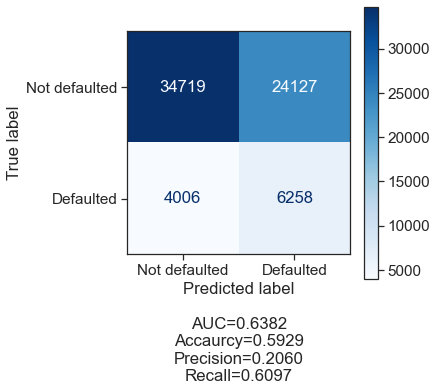

In [362]:
y_pred=rf1.predict(X_test)
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(5, 5))
y_pred_3=rf1.predict_proba(X_test)[:, 1]
plot_confusion_matrix(rf1, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax)
roc_auc_Logistic_regression= roc_auc_score(y_test, rf1.predict_proba(X_test)[:, 1])
print(roc_auc_Logistic_regression)
plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, rf1
                                          .predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))

In [105]:
from sklearn import set_config
set_config(display='diagram')
rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transf',
                                                                   PowerTransformer())]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'AVERAGE.ACCT.AGE',
                                                   'CREDIT.HIS...
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['branch_id', 'supplier_id',
                                                   'manufacturer_id',
                                                   'Current_pincode_ID',
                                                   'Employment.Type',
                                                   'State_ID',
                                                   'Employee_code_ID',
                                                   'Aadhar_flag', 'PAN_flag',
                                                   'VoterID_flag',
                                                   'Driving_flag',
                                                   'Passport_flag',
                                                   'total_identiy',
                                                   'Branch_Emp_code',
                                                   'Pin_Emp_code'])])),
                ('classifier', DummyClassifier(strategy='most_frequent'))])

## Decision Tree

In [211]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder( handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [212]:
rf2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(class_weight={0:1,1:7},max_features="auto", max_depth=10,
                                                           min_samples_split=140))])
rf2.fit(X_train,y_train) 
#print(cross_val_score(rf2,X_train, y_train, scoring="recall_score", cv=5))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'AVERAGE.ACCT.AGE',
                                                   'CREDIT.HISTORY.LENGTH',
                                                   'NO.OF_INQUIRIES', 'age',
                                                   'disbursed_amount_ass...
                                                  ['branch_id', 'supplier_id',
                                                   'manufacturer_id',
                                                   'Current_pincode_ID',
                                                   'Employment.Type',
                                                   'State_ID',
                                                   'Employee_code_ID',
                                                   'Aadhar_flag', 'PAN_flag',
                                                   'VoterID_flag',
                                                   'Driving_flag',
                                                   'Passport_flag',
                                                   'total_identiy',
                                                   'Branch_Emp_code',
                                                   'Pin_Emp_code'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight={0: 1, 1: 7}, max_depth=10,
                                        max_features='auto',
                                        min_samples_split=140))])

0.5289523332815625


Text(0.5, 0, 'Predicted label\n\nAUC=0.5290\nAccaurcy=0.1611\nPrecision=0.1493\nRecall=0.9898')

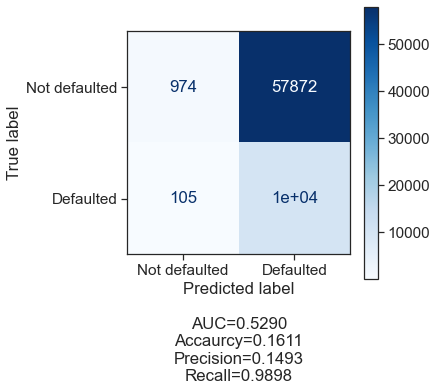

In [213]:
y_pred=rf2.predict(X_test)
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf2, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax)
Decision_tree= roc_auc_score(y_test, rf2.predict_proba(X_test)[:, 1])
print(Decision_tree)
plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, rf2
                                          .predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))

### Hyperparameter tuning of decision tree

In [211]:
param_dist = {"classifier__max_depth": list(range(1,16,1)),
              "classifier__min_samples_leaf": list(range(5,200,5)),
              "classifier__criterion": ["gini", "entropy"],
             "classifier__min_samples_split": list(range(5,400,5))
            }

grid = RandomizedSearchCV(rf2, param_dist, cv=3, n_jobs=-1, scoring='roc_auc', verbose=-1)


grid_result= grid.fit(X_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   59.0s finished


Best: 0.571915 using {'classifier__min_samples_split': 380, 'classifier__min_samples_leaf': 5, 'classifier__max_depth': 13, 'classifier__criterion': 'entropy'}


In [119]:
rf2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(class_weight={0:1,1:7},max_features="auto",
                                                           min_samples_split=380, min_samples_leaf=5, 
                                                            max_depth=13, criterion='entropy'))])
rf2.fit(X_train,y_train) 
#print(cross_val_score(rf2,X_train, y_train, scoring="recall_score", cv=5))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'AVERAGE.ACCT.AGE',
                                                   'CREDIT.HISTORY.LENGTH',
                                                   'NO.OF_INQUIRIES', 'age',
                                                   'disbursed_amount_ass...
                                                   'Current_pincode_ID',
                                                   'Employment.Type',
                                                   'State_ID',
                                                   'Employee_code_ID',
                                                   'Aadhar_flag', 'PAN_flag',
                                                   'VoterID_flag',
                                                   'Driving_flag',
                                                   'Passport_flag',
                                                   'total_identiy',
                                                   'Branch_Emp_code',
                                                   'Pin_Emp_code'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight={0: 1, 1: 7},
                                        criterion='entropy', max_depth=13,
                                        max_features='auto', min_samples_leaf=5,
                                        min_samples_split=380))])

0.5304988220240321


Text(0.5, 0, 'Predicted label\n\nAUC=0.5305\nAccaurcy=0.1546\nPrecision=0.1490\nRecall=0.9958')

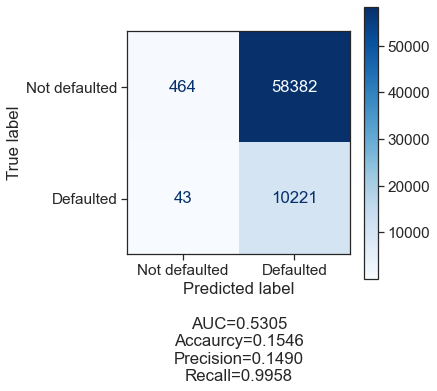

In [208]:
np.set_printoptions(suppress=True)
y_pred=rf2.predict(X_test)
y_pred_4=rf2.predict_proba(X_test)[:, 1]
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf2, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax,values_format='d')
Decision_tree= roc_auc_score(y_test, rf2.predict_proba(X_test)[:, 1])
print(Decision_tree)
plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, rf2
                                          .predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))

## Random Forest

In [214]:
rf3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight={0:1,1:7},max_depth=13))])

rf3.fit(X_train,y_train)
#print(cross_val_score(rf,X_train, y_train, scoring="roc_auc", cv=5))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'AVERAGE.ACCT.AGE',
                                                   'CREDIT.HISTORY.LENGTH',
                                                   'NO.OF_INQUIRIES', 'age',
                                                   'disbursed_amount_ass...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['branch_id', 'supplier_id',
                                                   'manufacturer_id',
                                                   'Current_pincode_ID',
                                                   'Employment.Type',
                                                   'State_ID',
                                                   'Employee_code_ID',
                                                   'Aadhar_flag', 'PAN_flag',
                                                   'VoterID_flag',
                                                   'Driving_flag',
                                                   'Passport_flag',
                                                   'total_identiy',
                                                   'Branch_Emp_code',
                                                   'Pin_Emp_code'])])),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 7},
                                        max_depth=13))])

0.6423191061883418


Text(0.5, 0, 'Predicted label\n\nAUC=0.6423\nAccaurcy=0.5144\nPrecision=0.1927\nRecall=0.7118')

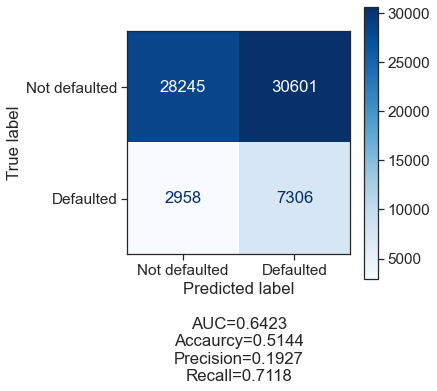

In [216]:
y_pred=rf3.predict(X_test)
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf3, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax)
Random_forest= roc_auc_score(y_test, rf3.predict_proba(X_test)[:, 1])
print(Random_forest)
plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, rf3
                                          .predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))

### Hyperparameter tuning of Random Forest

In [ ]:
param_dist = {"classifier__max_depth": list(range(1,16,1)),
              "classifier__min_samples_leaf": list(range(5,200,5)),
              "classifier__criterion": ["gini", "entropy"],
             "classifier__min_samples_split": list(range(5,400,5))
            }

In [217]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 200)]
max_features = ['auto', 'sqrt']
max_depth = list(range(1,16,1))
min_samples_split = list(range(5,400,5))
min_samples_leaf = list(range(5,200,5))
bootstrap = [True, False]
# Create the random grid
random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap}

In [218]:
grid = RandomizedSearchCV(rf3, random_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=-1)
grid_result= grid.fit(X_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.4min finished


Best: 0.641886 using {'classifier__n_estimators': 1882, 'classifier__min_samples_split': 70, 'classifier__min_samples_leaf': 25, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 11, 'classifier__bootstrap': True}


In [215]:
rf3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight={0:1,1:6},n_estimators=1882, 
                        min_samples_split=70, min_samples_leaf=25, max_features='sqrt', max_depth=11, 
                                                            bootstrap=True))])

rf3.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'AVERAGE.ACCT.AGE',
                                                   'CREDIT.HISTORY.LENGTH',
                                                   'NO.OF_INQUIRIES', 'age',
                                                   'disbursed_amount_ass...
                                                   'manufacturer_id',
                                                   'Current_pincode_ID',
                                                   'Employment.Type',
                                                   'State_ID',
                                                   'Employee_code_ID',
                                                   'Aadhar_flag', 'PAN_flag',
                                                   'VoterID_flag',
                                                   'Driving_flag',
                                                   'Passport_flag',
                                                   'total_identiy',
                                                   'Branch_Emp_code',
                                                   'Pin_Emp_code'])])),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 6}, max_depth=11,
                                        max_features='sqrt',
                                        min_samples_leaf=25,
                                        min_samples_split=70,
                                        n_estimators=1882))])

0.6414808389648778


Text(0.5, 0, 'Predicted label\n\nAUC=0.6415\nAccaurcy=0.4949\nPrecision=0.1904\nRecall=0.7380')

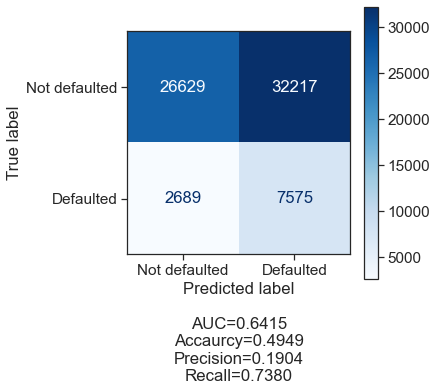

In [216]:
y_pred=rf3.predict(X_test)
y_pred_5=rf3.predict_proba(X_test)[:, 1]
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf3, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax)
Random_forest= roc_auc_score(y_test, rf3.predict_proba(X_test)[:, 1])
print(Random_forest)
plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, rf3
                                          .predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))

##  Gradien Boosting Machines

In [192]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder( handle_unknown='ignore'))])

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [225]:
model = XGBClassifier()
rf4 = Pipeline(steps=[('preprocessor', preprocessor),('classifier',model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
#scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
#from numpy import mean
#print('Mean ROC AUC: %.5f' % mean(scores))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
model = XGBClassifier(scale_pos_weight=6)
rf4 = Pipeline(steps=[('preprocessor', preprocessor),('classifier',model)])
scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f' % np.mean(scores))

In [228]:
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.66326


In [229]:
weights = list(range(5,8,1))
param_grid = dict(classifier__scale_pos_weight=weights)

In [230]:
grid = GridSearchCV(estimator=rf4, param_grid=param_grid, n_jobs=-1, cv=3, scoring='roc_auc', verbose=-1)
grid_result = grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  7.8min finished


In [231]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.662685 using {'classifier__scale_pos_weight': 7}
0.662599 (0.002119) with: {'classifier__scale_pos_weight': 5}
0.662572 (0.001990) with: {'classifier__scale_pos_weight': 6}
0.662685 (0.002609) with: {'classifier__scale_pos_weight': 7}


In [239]:
model = XGBClassifier(scale_pos_weight=7,max_depth=6)
rf4.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'AVERAGE.ACCT.AGE',
                                                   'CREDIT.HISTORY.LENGTH',
                                                   'NO.OF_INQUIRIES', 'age',
                                                   'disbursed_amount_ass...
                                        

0.6620970806688867


Text(0.5, 0, 'Predicted label\n\nAUC=0.6621\nAccaurcy=0.8517\nPrecision=0.7407\nRecall=0.0019')

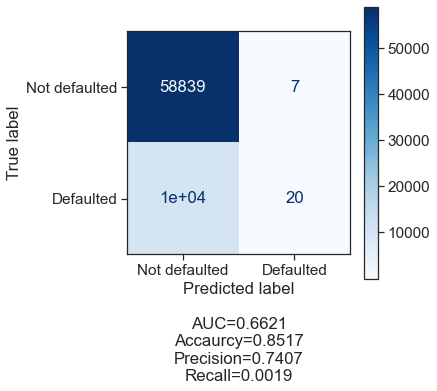

In [242]:
y_pred=rf4.predict(X_test)
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf4, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax)
xgb= roc_auc_score(y_test, rf4.predict_proba(X_test)[:, 1])
print(xgb)
plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, rf4
                                          .predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))

### Tune the Size of Decision 

In [243]:
xgb2 = XGBClassifier(seed=7,
 scale_pos_weight=7,max_depth=6)

In [244]:
rf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',xgb2)])
param_test1 = {'classifier__n_estimators':list(range(450,1000, 50))}
gsearch1 = GridSearchCV(rf, param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=3,verbose=10)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 125.6min
[Parallel(n_jobs=-1)]: Done  30 out of  33 | elapsed: 182.3min remaining: 18.2min
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed: 199.0min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['disbursed_amount',
                                                                          'asset_cost',
                                                                          'ltv',
                                                                          'PERFORM_CNS.SCORE',
                                                                          'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                                          'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                        

In [245]:
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
params = gsearch1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.672258 (0.001785) with: {'classifier__n_estimators': 450}
0.672046 (0.001617) with: {'classifier__n_estimators': 500}
0.672061 (0.001721) with: {'classifier__n_estimators': 550}
0.671935 (0.001774) with: {'classifier__n_estimators': 600}
0.671968 (0.001864) with: {'classifier__n_estimators': 650}
0.671836 (0.001799) with: {'classifier__n_estimators': 700}
0.671643 (0.001776) with: {'classifier__n_estimators': 750}
0.671385 (0.001777) with: {'classifier__n_estimators': 800}
0.671275 (0.001808) with: {'classifier__n_estimators': 850}
0.671155 (0.001831) with: {'classifier__n_estimators': 900}
0.670973 (0.001787) with: {'classifier__n_estimators': 950}


In [249]:
model1 = XGBClassifier(seed=7,
    scale_pos_weight=7,max_depth=6,classifier__n_estimators=450)
rf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',model1)])
rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'AVERAGE.ACCT.AGE',
                                                   'CREDIT.HISTORY.LENGTH',
                                                   'NO.OF_INQUIRIES', 'age',
                                                   'disbursed_amount_ass...
                                        

0.6715629524786535


Text(0.5, 0, 'Predicted label\n\nAUC=0.6716\nAccaurcy=0.5188\nPrecision=0.2014\nRecall=0.7556')

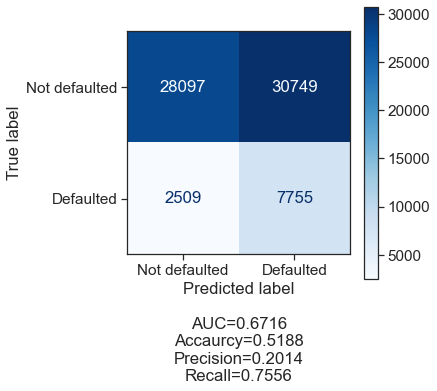

In [250]:
y_pred=rf.predict(X_test)
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax)
xgb= roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(xgb)
plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, rf
                                          .predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))

### Tune max_depth and min_child_weight

In [408]:
#b=rf['preprocessor'].transformers_[1][1]['onehot']\
                         #.get_feature_names(categorical_features)

In [252]:
xgb2 = XGBClassifier(n_estimators=450, seed=7,
       scale_pos_weight=7)

In [253]:
rf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',xgb2)])

In [254]:
param_test1 = {'classifier__max_depth':list(range(3,10,2)),'classifier__min_child_weight':list(range(1,6,2))}

In [255]:
gsearch1 = GridSearchCV(rf, param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=3,verbose=10)

In [256]:
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 67.4min
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed: 110.2min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 118.1min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['disbursed_amount',
                                                                          'asset_cost',
                                                                          'ltv',
                                                                          'PERFORM_CNS.SCORE',
                                                                          'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                                          'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                        

In [257]:
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
params = gsearch1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print(gsearch1.best_params_)    
print(gsearch1.best_score_)

0.672448 (0.002238) with: {'classifier__max_depth': 3, 'classifier__min_child_weight': 1}
0.672584 (0.002298) with: {'classifier__max_depth': 3, 'classifier__min_child_weight': 3}
0.672943 (0.002422) with: {'classifier__max_depth': 3, 'classifier__min_child_weight': 5}
0.673284 (0.002749) with: {'classifier__max_depth': 5, 'classifier__min_child_weight': 1}
0.674044 (0.002229) with: {'classifier__max_depth': 5, 'classifier__min_child_weight': 3}
0.674334 (0.002392) with: {'classifier__max_depth': 5, 'classifier__min_child_weight': 5}
0.671023 (0.001447) with: {'classifier__max_depth': 7, 'classifier__min_child_weight': 1}
0.672216 (0.002218) with: {'classifier__max_depth': 7, 'classifier__min_child_weight': 3}
0.672740 (0.002054) with: {'classifier__max_depth': 7, 'classifier__min_child_weight': 5}
0.667539 (0.001968) with: {'classifier__max_depth': 9, 'classifier__min_child_weight': 1}
0.669571 (0.002073) with: {'classifier__max_depth': 9, 'classifier__min_child_weight': 3}
0.670589 (

In [258]:
model1 = XGBClassifier(seed=7,
    scale_pos_weight=7,max_depth=5,classifier__n_estimators=450,min_child_weight=5)
rf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',model1)])
rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'AVERAGE.ACCT.AGE',
                                                   'CREDIT.HISTORY.LENGTH',
                                                   'NO.OF_INQUIRIES', 'age',
                                                   'disbursed_amount_ass...
                                        

0.6704592659906331


Text(0.5, 0, 'Predicted label\n\nAUC=0.6705\nAccaurcy=0.5100\nPrecision=0.2003\nRecall=0.7681')

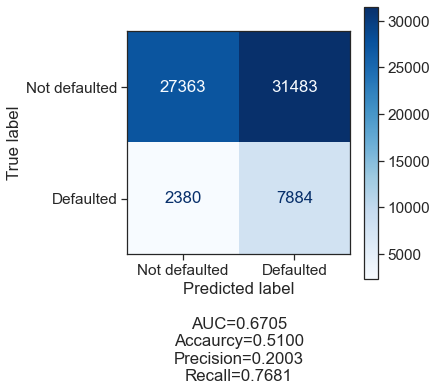

In [259]:
y_pred=rf.predict(X_test)
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax)
xgb= roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(xgb)
plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, rf
                                          .predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))

### Tune gamma

In [261]:
param_test2 = {
 'classifier__gamma':[i/5 for i in range(0,6)]
}

In [262]:
xgb3=XGBClassifier(seed=7,
    scale_pos_weight=7,n_estimators=450,max_depth=5,min_child_weight=5)

In [263]:
rf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',xgb3)])

In [264]:
gsearch2 = GridSearchCV(rf, param_grid = param_test2, scoring='roc_auc',n_jobs=-1, cv=3,verbose=4)

In [265]:
gsearch2.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  18 | elapsed: 51.1min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 59.3min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['disbursed_amount',
                                                                          'asset_cost',
                                                                          'ltv',
                                                                          'PERFORM_CNS.SCORE',
                                                                          'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                                          'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                        

In [266]:
print(gsearch2.best_params_)    
print(gsearch2.best_score_)

means = gsearch2.cv_results_['mean_test_score']
stds = gsearch2.cv_results_['std_test_score']
params = gsearch2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

{'classifier__gamma': 0.0}
0.674333892132497
0.674334 (0.002392) with: {'classifier__gamma': 0.0}
0.673981 (0.002262) with: {'classifier__gamma': 0.2}
0.673933 (0.002224) with: {'classifier__gamma': 0.4}
0.674153 (0.002468) with: {'classifier__gamma': 0.6}
0.674142 (0.002431) with: {'classifier__gamma': 0.8}
0.674176 (0.002605) with: {'classifier__gamma': 1.0}


In [121]:
model1 = XGBClassifier(seed=7,
    scale_pos_weight=7,max_depth=5,n_estimators=450,min_child_weight=5,gamma=0)
rf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',model1)])
rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'AVERAGE.ACCT.AGE',
                                                   'CREDIT.HISTORY.LENGTH',
                                                   'NO.OF_INQUIRIES', 'age',
                                                   'disbursed_amount_ass...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['branch_id', 'supplier_id',
                                                   'manufacturer_id',
                                                   'Current_pincode_ID',
                                                   'Employment.Type',
                                                   'State_ID',
                                                   'Employee_code_ID',
                                                   'Aadhar_flag', 'PAN_flag',
                                                   'VoterID_flag',
                                                   'Driving_flag',
                                                   'Passport_flag',
                                                   'total_identiy',
                                                   'Branch_Emp_code',
                                                   'Pin_Emp_code'])])),
                ('classifier',
                 XGBClassifier(max_depth=5, min_child_weight=5,
                               n_estimators=450, scale_pos_weight=7, seed=7))])

0.6776663844614007


Text(0.5, 0, 'Predicted label\n\nAUC=0.6777\nAccaurcy=0.5394\nPrecision=0.2076\nRecall=0.7458')

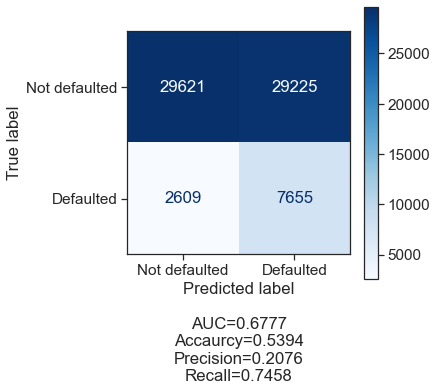

In [122]:
y_pred=rf.predict(X_test)
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax,values_format='d')
xgb= roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(xgb)
plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, rf
                                          .predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))

### Tune subsample and colsample_bytree

In [279]:
xgb6=XGBClassifier(seed=7,
    scale_pos_weight=7,max_depth=5,n_estimators=450,min_child_weight=5,gamma=0)

In [280]:
rf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',xgb6)])

In [281]:
param_test4 = {
 'classifier__subsample':[i/10.0 for i in range(6,10)],
 'classifier__colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [282]:
gsearch5 = GridSearchCV(rf, param_grid = param_test4, scoring='roc_auc',n_jobs=-1, cv=5,verbose=4)

In [ ]:
gsearch5.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 39.5min


In [ ]:
print(gsearch5.best_params_)    
print(gsearch5.best_score_)

###  Tune alpha

In [99]:
param_test6 = {
 'classifier__reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

In [100]:
xgb9=XGBClassifier( learning_rate=0.1, n_estimators=177, max_depth=8,
 min_child_weight=10, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=7)

In [101]:
rf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',xgb9)])

In [102]:
gsearch7 = GridSearchCV(rf, param_grid = param_test6, scoring='roc_auc',n_jobs=-1, cv=5)

In [103]:
gsearch7.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['disbursed_amount',
                                                                          'asset_cost',
                                                                          'ltv',
                                                                          'PERFORM_CNS.SCORE',
                                                                          'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                                          'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                        

In [104]:
print(gsearch7.best_params_)    
print(gsearch7.best_score_)

{'classifier__reg_alpha': 0.01}
0.6717102999414633


In [466]:
xgb10=XGBClassifier( learning_rate=0.01, n_estimators=1000, max_depth=8,
 min_child_weight=10, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4,seed=7, reg_alpha=0.01,class_weight=class_weights)

In [467]:
rf = imbPipeline(steps=[('preprocessor', preprocessor),
                     ('smt', RandomUnderSampler(random_state=7)),
                        ('classifier',xgb10)])

In [468]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transf',
                                                                   PowerTransformer())]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'AVERAGE.ACCT.AGE',
                                                   'CREDIT.HIS...
                                                   'Aadhar_flag', 'PAN_flag',
                                                   'VoterID_flag',
                                                   'Driving_flag',
                                                   'Passport_flag',
                                                   'total_identiy'])])),
                ('smt', RandomUnderSampler(random_state=7)),
                ('classifier',
                 XGBClassifier(class_weight={0: 0.5854487079025282,
                                             1: 3.4257317768359483},
                               colsample_bytree=0.8, gamma=0.3,
                               learning_rate=0.01, max_depth=8,
                               min_child_weight=10, n_estimators=1000,
                               nthread=4, reg_alpha=0.01, seed=7,
                               subsample=0.8))])

In [469]:
y_pred=rf.predict_proba(X_test)[:, 1]
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

ROC_AUC: 0.6744230059826423


In [193]:
model1 = XGBClassifier(seed=7,
    scale_pos_weight=7,max_depth=5,n_estimators=450,min_child_weight=5,gamma=0,
                      subsample=0.8, colsample_bytree=0.8,reg_alpha=0.01)
rf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',model1)])
rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'PERFORM_CNS.SCORE',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'AVERAGE.ACCT.AGE',
                                                   'CREDIT.HISTORY.LENGTH',
                                                   'NO.OF_INQUIRIES', 'age',
                                                   'disbursed_amount_ass...
                                                   'manufacturer_id',
                                                   'Current_pincode_ID',
                                                   'Employment.Type',
                                                   'State_ID',
                                                   'Employee_code_ID',
                                                   'Aadhar_flag', 'PAN_flag',
                                                   'VoterID_flag',
                                                   'Driving_flag',
                                                   'Passport_flag',
                                                   'total_identiy',
                                                   'Branch_Emp_code',
                                                   'Pin_Emp_code'])])),
                ('classifier',
                 XGBClassifier(colsample_bytree=0.8, max_depth=5,
                               min_child_weight=5, n_estimators=450,
                               reg_alpha=0.01, scale_pos_weight=7, seed=7,
                               subsample=0.8))])

0.6797430585822528


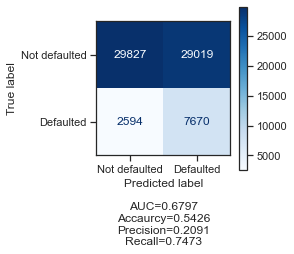

In [194]:
np.set_printoptions(suppress=True)
y_pred=rf.predict(X_test)
y_pred_2=rf.predict_proba(X_test)[:, 1]
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.0)
fig, ax = plt.subplots(figsize=(3, 3))
plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax,values_format='d')
plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, rf
                                          .predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))
xgb= roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(xgb)

## SVM

In [130]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('transf',PowerTransformer())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder( handle_unknown='ignore'))])

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(gamma='auto',probability=True))])
#print(cross_val_score(rf,X_train, y_train, scoring="roc_auc", cv=5))
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) }")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
y_pred=rf.predict_proba(X_test)[:, 1]
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")



In [ ]:
y_pred=rf.predict_proba(X_test)[:, 1]
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")


## CatBoost

In [622]:
#X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train,y_train,
#test_size=0.2,random_state=7)
tr=X_train[X_train['PERFORM_CNS.SCORE']>0]['PERFORM_CNS.SCORE'].median()
ts=X_test[X_test['PERFORM_CNS.SCORE']>0]['PERFORM_CNS.SCORE'].median()
X_train=X_train.replace(0,tr)
X_test=X_test.replace(0,tr)

In [623]:
cat_features_names = categorical_features # here we specify names of categorical features
cat_features = [X_train.columns.get_loc(col) for col in cat_features_names]
print(cat_features)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 33, 41, 42]


In [624]:
#rus = RandomUnderSampler(random_state=7)
#X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [625]:
train_pool = Pool(data=X_train,label=y_train,
cat_features=cat_features)
test_pool  = Pool(data=X_test, label=y_test,cat_features=cat_features)

### Train Model

In [626]:
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'iterations':6000,
          'cat_features': cat_features,
          'early_stopping_rounds': 500,
          'custom_loss': ['AUC','Accuracy' ,'Precision', 'Recall'],
          'class_weights': {0: 1, 1: 7},
          #'auto_class_weights': 'Balanced',
          'verbose' : 250,
          'use_best_model': True,
          'ignored_features': ['Driving_flag', 'Passport_flag', 'Aadhar_flag'], 
          'depth' : 4
          
         }

In [627]:
#print(cbc_1.get_all_params())

In [628]:
cbc_1 = CatBoostClassifier(**params)
cbc_1.fit(train_pool,eval_set=(test_pool),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.058276
0:	test: 0.5997832	best: 0.5997832 (0)	total: 1.27s	remaining: 2h 6m 41s
250:	test: 0.6814708	best: 0.6814708 (250)	total: 1m	remaining: 22m 58s
500:	test: 0.6864823	best: 0.6864823 (500)	total: 2m 1s	remaining: 22m 14s
750:	test: 0.6883191	best: 0.6883243 (749)	total: 3m 7s	remaining: 21m 52s
1000:	test: 0.6891699	best: 0.6891813 (984)	total: 4m 14s	remaining: 21m 11s
1250:	test: 0.6898693	best: 0.6898693 (1250)	total: 5m 38s	remaining: 21m 26s
1500:	test: 0.6903079	best: 0.6903079 (1500)	total: 6m 50s	remaining: 20m 30s
1750:	test: 0.6907422	best: 0.6907422 (1750)	total: 8m 6s	remaining: 19m 41s
2000:	test: 0.6908967	best: 0.6909458 (1984)	total: 9m 36s	remaining: 19m 12s
2250:	test: 0.6911139	best: 0.6911221 (2247)	total: 10m 51s	remaining: 18m 5s
2500:	test: 0.6914667	best: 0.6914753 (2477)	total: 12m 6s	remaining: 16m 56s
2750:	test: 0.6915396	best: 0.6915525 (2600)	total: 13m 23s	remaining: 15m 49s
3000:	test: 0.6917184	best: 0.6917685 (2972)	total: 

In [133]:
print(cbc_1.get_best_score())


{'learn': {'Recall:use_weights=false': 0.8417478375096041, 'Accuracy:use_weights=true': 0.6853455424883996, 'Logloss': 0.5927989517819336, 'Accuracy:use_weights=false': 0.5877020359142804, 'Precision:use_weights=false': 0.23309431800880176, 'Precision:use_weights=true': 0.6802649118723684, 'Recall:use_weights=true': 0.8417478375096041}, 'validation': {'Accuracy:use_weights=false': 0.571972218202865, 'Recall:use_weights=false': 0.8482073265783321, 'Precision:use_weights=false': 0.21810651577903517, 'Accuracy:use_weights=true': 0.6464489571059115, 'AUC': 0.6920720460057057, 'Logloss': 0.6297887152027183, 'Precision:use_weights=true': 0.6613184425297521, 'Recall:use_weights=true': 0.8482073265783321}}


In [134]:
cbc_1.shrink(4227, 0)

### Hyper Parameter Optimization

In [259]:
from catboost import CatBoost

In [367]:
'''params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'iterations':6000,
          'cat_features': cat_features,
          'early_stopping_rounds': 1000,
          'custom_loss': ['AUC','Accuracy' ,'Precision', 'Recall'],
          'class_weights': {0: 1, 1: 7},
          #'auto_class_weights': 'Balanced',
          'verbose' : 250,
          #'use_best_model': True,
          'ignored_features': ['Driving_flag', 'Passport_flag', 'Aadhar_flag'], 
          
          
         }
model=CatBoostClassifier(**params)
parameters = {'depth':[3,4,5],
          'l2_leaf_reg':[4,5]
             }


grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 3, n_jobs=-1,verbose=2,scoring="roc_auc")
grid.fit(X_train, y_train,cat_features=cat_features)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
      grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
      grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
      grid.best_params_)
print("\n ========================================================")
'''

'params = {\'loss_function\':\'Logloss\', # objective function\n          \'eval_metric\':\'AUC\', # metric\n          \'iterations\':6000,\n          \'cat_features\': cat_features,\n          \'early_stopping_rounds\': 1000,\n          \'custom_loss\': [\'AUC\',\'Accuracy\' ,\'Precision\', \'Recall\'],\n          \'class_weights\': {0: 1, 1: 7},\n          #\'auto_class_weights\': \'Balanced\',\n          \'verbose\' : 250,\n          #\'use_best_model\': True,\n          \'ignored_features\': [\'Driving_flag\', \'Passport_flag\', \'Aadhar_flag\'], \n          \n          \n         }\nmodel=CatBoostClassifier(**params)\nparameters = {\'depth\':[3,4,5],\n          \'l2_leaf_reg\':[4,5]\n             }\n\n\ngrid = GridSearchCV(estimator=model, param_grid = parameters, cv = 3, n_jobs=-1,verbose=2,scoring="roc_auc")\ngrid.fit(X_train, y_train,cat_features=cat_features)\n\n# Results from Grid Search\nprint("\n========================================================")\nprint(" Results fro

### Metrics calculation and graph ploting

In [368]:
'''def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]
    '''

'def adjusted_classes(y_scores, t):\n    """\n    This function adjusts class predictions based on the prediction threshold (t).\n    Will only work for binary classification problems.\n    """\n    return [1 if y >= t else 0 for y in y_scores]\n    '

In [415]:
from catboost.utils import select_threshold
t=select_threshold(cbc_1,test_pool, FPR=0.6)
t

0.4295727319707135

Text(0.5, 0, 'Predicted label\n\nAUC=0.6921\nAccaurcy=0.5708\nPrecision=0.2179\nRecall=0.7298')

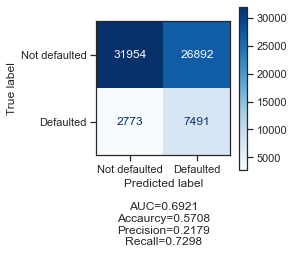

In [190]:
y_pred=cbc_1.predict(X_test)
sns.set_style("dark")
sns.set(style='ticks',font_scale=1.0)
fig, ax = plt.subplots(figsize=(3, 3))
catboost=roc_auc_score(y_test, cbc_1.predict_proba(X_test)[:, 1])
plot_confusion_matrix(cbc_1, X_test, y_test,cmap=plt.cm.Blues, 
                     display_labels=['Not defaulted', 'Defaulted'] ,ax=ax)
plt.xlabel('Predicted label\n\nAUC={:0.4f}\nAccaurcy={:0.4f}\nPrecision={:0.4f}\nRecall={:0.4f}'.format(
                            roc_auc_score(y_test, cbc_1.predict_proba(X_test)[:, 1]),
                            accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred)))

In [79]:
metrics=cbc_1.eval_metrics(data=test_pool,metrics=['AUC','Accuracy' ,'Precision', 'Recall'],
                          ntree_start=0, ntree_end=4227, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [82]:
metrics=cbc_1.eval_metrics(data=test_pool,metrics=['AUC','Accuracy' ,'Precision', 'Recall'],
                          ntree_start=4226, ntree_end=4227)
metrics

{'AUC': [0.6920720460057057],
 'Accuracy': [0.6457144168821828],
 'Precision': [0.6610066936429301],
 'Recall': [0.7298324240062354]}

In [405]:
pd.DataFrame.from_dict(cbc_1.get_best_score())

learn  validation
Recall:use_weights=false    0.84   0.85       
Accuracy:use_weights=true   0.69   0.65       
Logloss                     0.59   0.63       
Accuracy:use_weights=false  0.59   0.57       
Precision:use_weights=false 0.23   0.22       
Precision:use_weights=true  0.68   0.66       
Recall:use_weights=true     0.84   0.85       
AUC                         nan    0.69

In [165]:
rr= [{'AUC': Dummy_calssifier}, {'AUC': roc_auc_Logistic_regression},{'AUC': Decision_tree},
     {'AUC':  Random_forest},
     {'AUC': xgb},{'AUC': catboost}]

In [166]:
df_r = pd.DataFrame(rr, index =['Dummy calssifier', 'Logistic regression', 'Decision tree', 'Random forest',
                               'XGBoost', 'Catboost'])

In [167]:
df_r=df_r.reset_index()

In [168]:
df_r.rename(columns={'index':'Models'}, inplace=True)

[Text(0, 0, 'Dummy calssifier'),
 Text(1, 0, 'Logistic regression'),
 Text(2, 0, 'Decision tree'),
 Text(3, 0, 'Random forest'),
 Text(4, 0, 'XGBoost'),
 Text(5, 0, 'Catboost')]

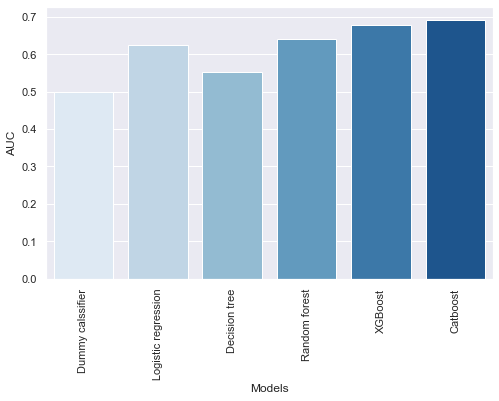

In [169]:
sns.set()
plt.subplots(figsize=(8,5))
ax = sns.barplot(x="Models", y="AUC", data=df_r, palette='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

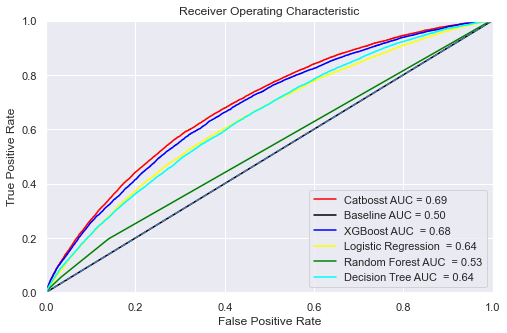

In [218]:
sns.set()
plt.subplots(figsize=(8,5))
from sklearn import metrics
yprobs = cbc_1.predict_proba(X_test)
ypreds = yprobs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, ypreds)
roc_auc = metrics.auc(fpr, tpr)

fpr1, tpr1, threshold = metrics.roc_curve(y_test, y_pred_1)
roc_auc1 = metrics.auc(fpr1, tpr1)

fpr2, tpr2, threshold = metrics.roc_curve(y_test, y_pred_2)
roc_auc2 = metrics.auc(fpr2, tpr2)

fpr3, tpr3, threshold = metrics.roc_curve(y_test, y_pred_3)
roc_auc3 = metrics.auc(fpr3, tpr3)

fpr4, tpr4, threshold = metrics.roc_curve(y_test, y_pred_4)
roc_auc4 = metrics.auc(fpr4, tpr4)

fpr5, tpr5, threshold = metrics.roc_curve(y_test, y_pred_5)
roc_auc5 = metrics.auc(fpr5, tpr5)

plt.plot(fpr, tpr, 'red', label = 'Catbosst AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'black', label = 'Baseline AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'blue', label = 'XGBoost AUC  = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'yellow', label = 'Logistic Regression  = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'green', label = 'Random Forest AUC  = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, 'cyan', label = 'Decision Tree AUC  = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [237]:
y_test.to_frame()
df__ = pd.DataFrame()
df__['y_test']=y_test
df__['cat']=ypreds
df__['Simple baseline']=y_pred_1
df__['Gradien Boosting']=y_pred_2
df__['Logistic Regression']=y_pred_3
df__['Decision Tree']=y_pred_4
df__['Random forest']=y_pred_5


/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:316: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y, color=color, label=label, **kwargs)
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:316: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 a

Text(0, 0.5, 'Probability Density')

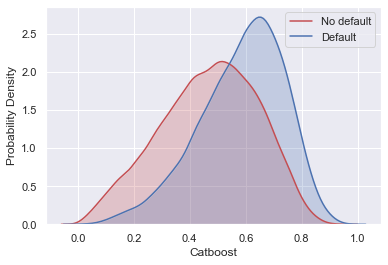

In [232]:
sns.kdeplot(df__.loc[(df__['y_test']==0), 
            'cat'], color='r', shade=True, Label='No default') 
sns.kdeplot(df__.loc[(df__['y_test']==1), 
            'cat'], color='b', shade=True, Label='Default') 
  
plt.xlabel('Catboost') 
plt.ylabel('Probability Density')

/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:316: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y, color=color, label=label, **kwargs)
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:316: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 a

Text(0, 0.5, 'Probability Density')

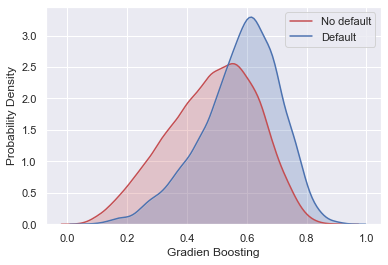

In [234]:
sns.kdeplot(df__.loc[(df__['y_test']==0), 
            'Gradien Boosting'], color='r', shade=True, Label='No default') 
sns.kdeplot(df__.loc[(df__['y_test']==1), 
            'Gradien Boosting'], color='b', shade=True, Label='Default') 
  
plt.xlabel('Gradien Boosting') 
plt.ylabel('Probability Density')

/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:316: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y, color=color, label=label, **kwargs)
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:316: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 a

Text(0, 0.5, 'Probability Density')

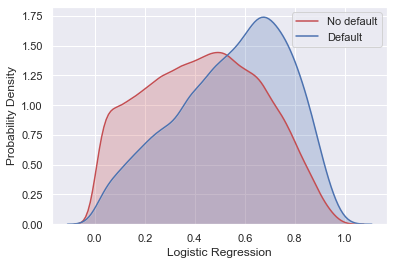

In [235]:
sns.kdeplot(df__.loc[(df__['y_test']==0), 
            'Logistic Regression'], color='r', shade=True, Label='No default') 
sns.kdeplot(df__.loc[(df__['y_test']==1), 
            'Logistic Regression'], color='b', shade=True, Label='Default') 
  
plt.xlabel('Logistic Regression') 
plt.ylabel('Probability Density')

In [640]:
df_fimp = cbc_1.get_feature_importance(prettified=True)
df_fimp.sort_values(by='Importances',ascending=True)
df_fimp=df_fimp[df_fimp['Importances']>3.57]
df_fimp

Feature Id  Importances
0   branch_id                6.59        
1   PERFORM_CNS.SCORE        6.22        
2   extra_finance            5.92        
3   Employee_code_ID         5.17        
4   supplier_id              4.67        
5   Branch_Emp_code          3.96        
6   value_cost               3.91        
7   SACTIONED_DISBURSE_ratio 3.90        
8   total_identiy            3.69        
9   asset_cost               3.64        
10  asset_value              3.57

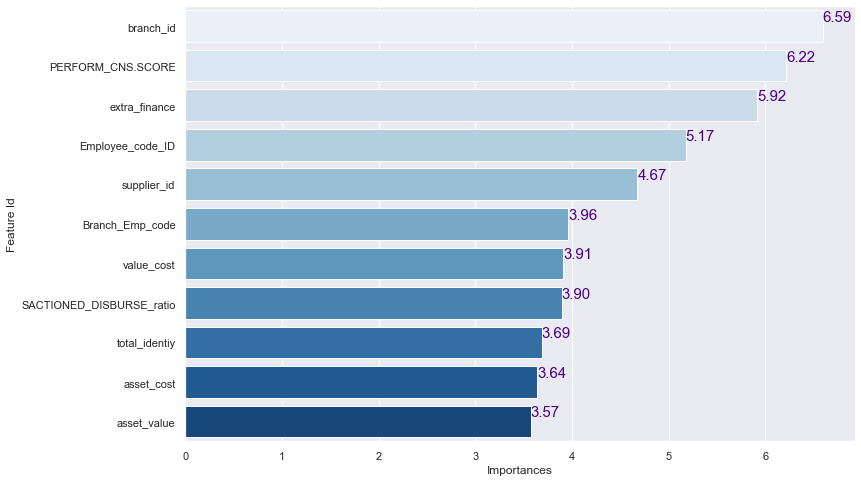

In [641]:
sns.set()
plt.figure(figsize=(12,8))
#df_fimp = cbc_1.get_feature_importance(prettified=True)
ax = sns.barplot(x=df_fimp.columns[1], y=df_fimp.columns[0], palette='Blues',data=df_fimp);

for p in ax.patches:
    x = p.get_width()
    y = p.get_y()
    text = '{:.2f}'.format(p.get_width())
    ax.text(x, y,text,fontsize=15,color='indigo',va='top',ha='left')

### Cross Validation

In [414]:
from catboost import cv
df_scores = cv(train_pool,
            params,
            fold_count=5,
            verbose=100,
            shuffle=True,
            stratified=True,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6088662	best: 0.6088662 (0)	total: 1.81s	remaining: 2h 30m 45s
100:	test: 0.6699476	best: 0.6699476 (100)	total: 2m 20s	remaining: 1h 53m 20s
200:	test: 0.6766272	best: 0.6766272 (200)	total: 5m 13s	remaining: 2h 5m 31s
300:	test: 0.6796179	best: 0.6796179 (300)	total: 8m 32s	remaining: 2h 14m 44s
400:	test: 0.6817858	best: 0.6817858 (400)	total: 11m 17s	remaining: 2h 10m 34s
500:	test: 0.6836076	best: 0.6836076 (500)	total: 14m 9s	remaining: 2h 7m 57s
600:	test: 0.6848611	best: 0.6848611 (600)	total: 16m 59s	remaining: 2h 4m 56s
700:	test: 0.6857478	best: 0.6857478 (700)	total: 19m 56s	remaining: 2h 2m 48s
800:	test: 0.6862940	best: 0.6862940 (800)	total: 23m 12s	remaining: 2h 2m 9s
900:	test: 0.6868663	best: 0.6868663 (900)	total: 26m 9s	remaining: 1h 59m 23s
1000:	test: 0.6872396	best: 0.6872396 (1000)	total: 29m 49s	remaining: 1h 59m 32s
1100:	test: 0.6875260	best: 0.6875260 (1100)	total: 32m 57s	remaining: 1h 57m 2s
1200:	test: 0.6877619	best: 0.6877639 (1199)	total: 36

KeyboardInterrupt: 

In [ ]:
print(df_scores.columns)
df_scores

### Model explainability

In [1237]:
for i in numeric_features:
    cbc_1.calc_feature_statistics(X_train, y_train, i , plot=True)